<h1><b>Customer Segmentation of Olist Brazilian ECommerce</b></h1>
Using RFM and K-Means Clustering


**By: Team BETA**

1. Yosafat Kurniawan
2. Hari Prasetyo
***

Content
1. Problem Statement
2. Data Understanding
3. Exploratory Data Analysis
4. Preprocessing
5. Methodology (Analysis & Modeling)
6. Conclusion and Recommendation

## **1. Problem Statement**

**Context**

Dataset ini disediakan oleh Olist, department store terbesar di pasar Brazil. Olist menghubungkan bisnis kecil dari seluruh Brazil ke seluruh jaringan tanpa kerumitan dan dengan satu kontrak. Penjual dapat menjual produknya melalui Olist Store dan mengirimkannya langsung ke pelanggan menggunakan mitra logistik dari Olist. Setelah konsumen membeli produk dari Olist Store, penjual akan diberi notifikasi untuk memenuhi pesanan tersebut. Setelah pelanggan menerima produk atau perkiraan tanggal pengiriman, pelanggan mendapatkan survei kepuasan melalui email dimana pelanggan dapat memberikan catatan terhadap pengalaman pembelian dan juga menuliskan komentar.

**Problem Statement**

Bisnis ecommerce tentunya membutuhkan transaksi dari konsumen-konsumennya secara berkelanjutan agar dapat bertahan. Olist Ecommerce perlu mengetahui seperti apa karakteristik dan perilaku dari konsumennya. Dengan demikian, Olist Ecommerce akan dapat menentukan strategi apa yang perlu diambil ke depannya dalam kegiatan pemasarannya.


Segmentasi dan target pasar merupakan salah satu fondasi dasar dalam bisnis Ecommerce. Berdasarkan artikel yang diterbitkan oleh [Agenciaeplus](https://agenciaeplus.com.br/en/e-commerces-brasileiros-marketing/), bahwa E-Commerce di Brazil menghabiskan 13% dari revenue-nya untuk kebutuhan pemasaran. Dengan melakukan prediksi segmentasi pasar, kita dapat mengarahkan strategi kegiatan pemasaran kepada segmen/kelompok konsumen yang disesuaikan dengan karakteristiknya, sehingga kegiatan pemasaran bisa lebih efektif dan efisien. Segmentasi pasar dapat ditinjau dari berbagai sudut pandang, seperti kemampuan bayar, demografi, waktu, dll.

**Goals**

Berdasarkan permasalahan tersebut, perusahaan Olist ingin memiliki kemampuan 
untuk memprediksi segmentasi dari konsumen-konsumennya, sehingga perusahaan dapat melakukan kegiatan pemasaran dengan efektif dan meningkatkan penjualannya.

**Analytic Approach**

Beberapa metode analitik yang akan digunakan yaitu pertama melakukan analisis RFM dan kedua melakukan Clustering dengan metode KMeans. Dengan menggunakan Clustering Kmeans, dapat diperoleh segmentasi konsumen sesuai dengan kemiripan karakteristiknya. Dengan analisis RFM, kita dapat melihat segmen konsumen juga yang ditinjau dari karakteristik Recency, Frequency, dan Monetary nya. Pada akhirnya di tiap metode yang dilakukan akan dapat ditentukan kegiatan pemasaran yang sesuai untuk masing-masing segmen konsumen.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah elbow method dan silhouette score. Kedua metode tersebut digunakan untuk melihat berapa jumlah cluster yang optimal untuk clustering. Elbow method dapat melihat perubahan tingkat kemiripan setiap penambahan satu cluster. Jumlah cluster yang dipilih adalah jumlah cluster dimana tingkat kemiripan clusternya berubah dari perubahan yang signifikan menjadi tidak signifikan. Pada grafik Elbow Method dapat dilihat pada titik yang membentuk siku. Sedangkan Silhouette score pada dasarnya suatu ukuran yang mengkombinasikan seberapa dekat setiap data poin dalam suatu cluster yang sama dengan seberapa dekat setiap data poin pada cluster tersebut dengan data poin pada cluster lainnya. Jumlah cluster yang dipilih adalah yang memiliki nilai silhouette paling tinggi.

***
## **2. Data Understanding**

![Olist Data Schema](https://imgur.com/HRhd2Y0.png)

Data terdiri dari 9  dataset dengan skema seperti gambar di atas.

**Attribute Information**

**olist_customers_dataset.csv**

| Columns Name | Data Type, Length | Description | 
| -- | -- | -- | 
| ***customer_id***| object |  ID Customer. (*Key to the orders dataset*)|
| customer_unique_id | object | ID unik pengidentifikasi customer.| 
| customer_zip_code_prefix | int64 | Lima digit pertama kode pos (*Format kode pos brazil: XXXXX-XXXX*)| 
| customer_city  |  object |Nama kota customer| 
| customer_state |  object |Nama negara bagian customer| 

<br>

**olist_geolocation_dataset.csv**

| Columns Name | Data Type, Length | Description| 
| -- | -- | -- | 
| geolocation_zip_code_prefix | int64 |Lima digit pertama kode pos| 
| geolocation_lat | float64 |Latitude| 
| geolocation_lng | float64 |Longitude| 
| geolocation_city |  object |Nama kota| 
| geolocation_state |  object |Nama negara bagian| 

<br>

**olist_order_items_dataset.csv**

| Columns Name | Data Type, Length | Description | 
| -- | -- | -- | 
| order_id  |  object |ID unik setiap order| 
| order_item_id | int64 | Nomor urut mengidentifikasi jumlah item yang termasuk dalam order yang sama| 
| product_id  |  object |ID unik setiap produk| 
| seller_id | object  |ID unik setiap penjual|
| shipping_limit_date| object  | Tanggal batas pengiriman penjual untuk menangani pesanan ke mitra logistik | 
| price | float64 |Harga item| 
| freight_value | float64 |Ongkos kirim (jika satu order memiliki lebih dari satu item, nilai ongkos kirim dibagi antara item)| 

<br>

**olist_order_payments_dataset.csv**

| Columns Name | Data Type, Length | Description | 
| -- | -- | -- | 
| order_id  |  object |ID unik setiap order|
| payment_sequential | int64 |Customer dapat membayar order dengan lebih dari satu metode pembayaran. Ini adalah urutan pembayarannya| 
| payment_type |  object |Metode pembayaran yang dipilih customer.| 
| payment_installments | int64 |Jumlah installments yang dipilih customer.| 
| payment_value  | float64 | transaction value.| 

<br>

**olist_order_reviews_dataset.csv**

| Columns Name | Data Type, Length | Description | 
| -- | -- | -- | 
| review_id | object | ID ulasan |
| order_id | object | ID unik setiap order |
| review_score |float64 |  Penilaian angka 1 sampai 5 yang diberikan oleh pelanggan pada satisfaction survey| 
| review_comment_title | object | Judul komentar oleh customer dalam bahasa Portugis |
| review_comment_message | object |  Isi komentar oleh customer dalam bahasa Portugis |
| review_creation_date | object| Tanggal pengiriman satisfaction survey kepada customer |
| review_answer_timestamp | object | Tanggal dan waktu jawaban survei kepuasan oleh customer |

<br>

**olist_orders_dataset.csv**

| Columns Name | Data Type, Length | Description | 
| -- | -- | -- | 
| order_id | object |  ID unik setiap order |
| customer_id | object |  ID Customer|
| order_status | object |  Status pesanan ('delivered', 'shipped', etc.) |
| order_purchase_timestamp  | object | Waktu pembelian |
| order_approved_at | object | Waktu persetujuan pembayaran |
| order_delivered_carrier_date | object | Tanggal pengiriman pesanan oleh mitra logistik |
| order_delivered_customer_date | object | Tanggal aktual penerimaan pesanan oleh customer |
| order_estimated_delivery_date | object | Tanggal perkiraan delivery yang diinformasikan kepada pelanggan pada saat pembelian |

<br>

**olist_products_dataset.csv**

| Columns Name | Data Type, Length | Description | 
| -- | -- | -- | 
| product_id | object | ID produk |
| product_category_name | float64| Nama kategori produk dalam bahasa Portugis |
| product_name_lenght | float64| Panjang karakter nama produk |
| product_description_length | float64| Panjang karakter deskripsi produk |
| product_photos_qty | float64| Jumlah foto produk |
| product_weight_g |float64 | Berat produk (g)|
| product_length_cm | float64| Panjang produk (cm) |
| product_height_cm |float64 | Tinggi produk (cm) |
| product_width_cm | float64|  Lebar produk (cm) |

<br>

**olist_sellers_dataset.csv**

| Columns Name | Data Type, Length | Description | 
| -- | -- | -- | 
| seller_id | object | ID penjual |
| seller_zip_code_prefix | int64 | Lima digit pertama kode pos penjual |
| seller_city | object | Kota penjual |
| seller_state | object | Negara bagian penjual |

<br>

**product_category_name_translation.csv**

| Columns Name | Data Type, Length | Description | 
| -- | -- | -- | 
| product_category_name | object | Nama kategori produk dalam bahasa Portugis |
| product_category_name_english | object | Nama kategori produk dalam bahasa Inggris |

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from operator import attrgetter

import warnings
warnings.filterwarnings('ignore')

**Load & Merge Data**

In [ ]:
# Load data
customers = pd.read_csv('olist_customers_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
prod_cat= pd.read_csv('product_category_name_translation.csv')

In [ ]:
# Menggabungkan product category bahasa inggris ke product_dataset
products = pd.merge(prod_cat, products, on='product_category_name', how='left')
products.drop('product_category_name', axis=1, inplace=True)

In [ ]:
# Menggabungkan data menjadi satu data frame
df = pd.merge(orders, order_items, on='order_id', how='left')
df = pd.merge(df, order_payments, on='order_id', how='left')
df = pd.merge(df, order_reviews, on='order_id', how='left')
df = pd.merge(df, customers, on='customer_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_city,customer_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,sao paulo,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,sao paulo,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,sao paulo,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,barreiras,BA,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,vianopolis,GO,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [ ]:
#Melihat jumlah baris dan kolom dari dataframe
df.shape

(119143, 36)

**Fitur Numerikal**

In [ ]:
numerical = df.select_dtypes(exclude=object).columns
display(numerical)

df.describe()

Index(['order_item_id', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score',
       'customer_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,119143.000000,116576.000000,116576.000000,116576.000000,116575.000000,116575.000000,116575.000000,116575.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,35033.451298,48.766032,785.973151,2.205008,2115.479108,30.318499,16.645584,23.116620
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,29823.198969,10.033893,652.619510,1.717440,3783.564729,16.223095,13.474381,11.758514
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,11250.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,24240.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,58475.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,99990.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Fitur Kategorikal**

In [ ]:
categorical = df.select_dtypes(include=object).columns
display(categorical)

df.describe(include=object)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'seller_id', 'shipping_limit_date', 'payment_type',
       'review_id', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_city', 'customer_state', 'product_category_name_english'],
      dtype='object')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,payment_type,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_city,customer_state,product_category_name_english
count,119143,119143,119143,119143,118966,117057,115722,119143,118310,118310,...,119140,118146,13989,50245,118146,118146,119143,119143,119143,116576
unique,99441,99441,8,98875,90733,81018,95664,459,32951,3095,...,5,98410,4527,36159,636,98248,96096,4119,27,71
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,...,credit_card,eef5dbca8d37dfce6db7d7b16dd0525e,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,bed_bath_table
freq,63,63,115723,63,63,63,63,663,536,2155,...,87776,63,494,259,547,63,75,18875,50265,11988


***
## **3. Exploratory Data Analysis**

### 1. Data Distribution

In [ ]:
df_dist = df[['customer_unique_id','price','freight_value','payment_value','review_score']].groupby('customer_unique_id').agg({'price': np.sum,'freight_value': np.sum,'payment_value': np.sum,'review_score': np.mean})

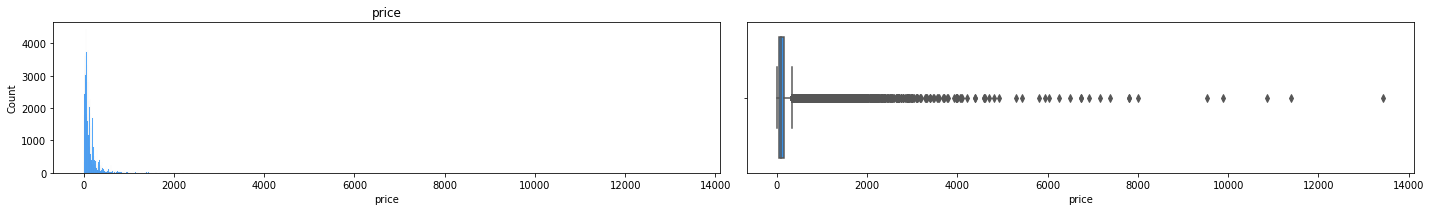

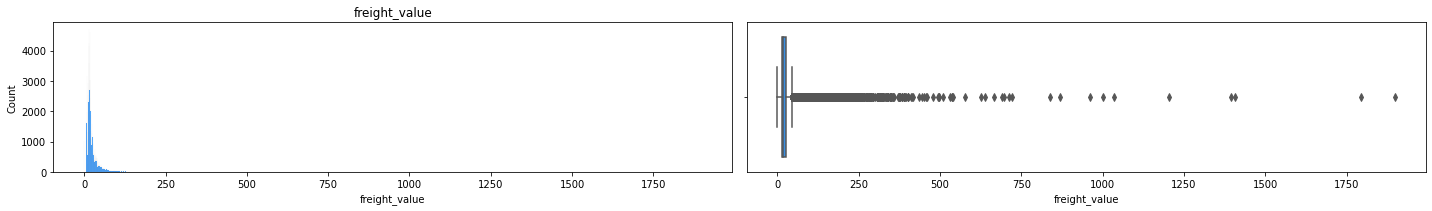

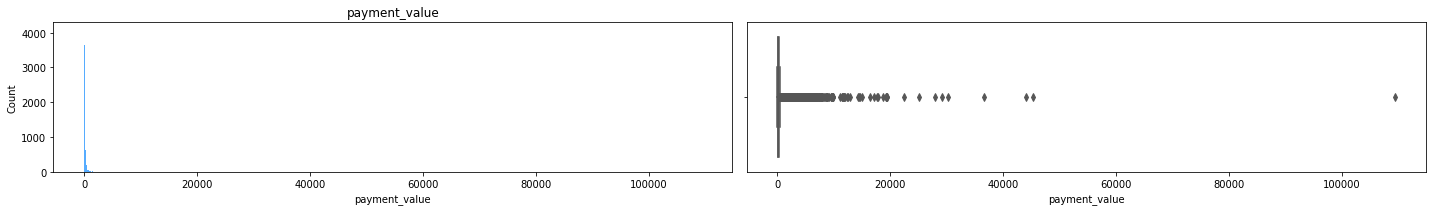

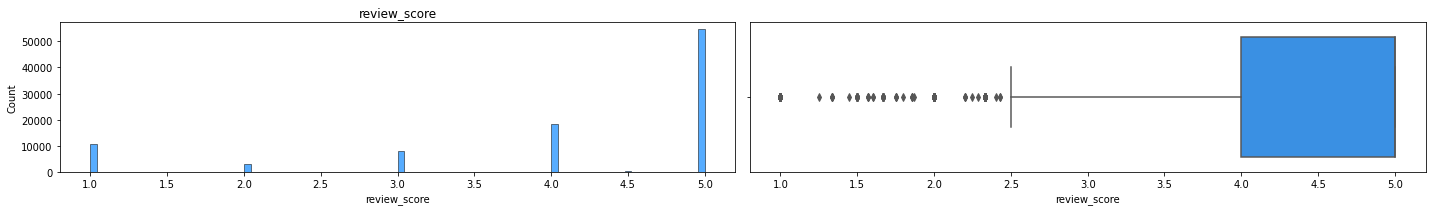

In [ ]:
# Memeriksa distribusi data numerikal

for i in ['price','freight_value','payment_value','review_score']: 
    plt.figure(figsize=(20, 40))
    sns.histplot(x=df_dist[i], ax=plt.subplot(len(numerical),2,1),color='dodgerblue')
    plt.title(i)
    sns.boxplot(x=df_dist[i], ax=plt.subplot(len(numerical),2,2),color='dodgerblue')
    plt.tight_layout()
    plt.show()

Terlihat bahwa distribusi data miring ke kanan (*right skewed*) dan juga terdapat banyak outliers. Namun karena data merupakan data e-commerce dengan jumlah dan jenis produk yang  banyak, maka hal tersebut dapat dikatakan hal yang wajar. Jika kita menghapus outliers, justru akan menghilangkan informasi dari apa yang terjadi pada e-commerce tersebut. Untuk sementara ini outliers tidak akan dilakukan perubahan. Karena data tidak terdistribusi normal, maka central of tendency yang digunakan adalah median.

### 2. Data Correlation

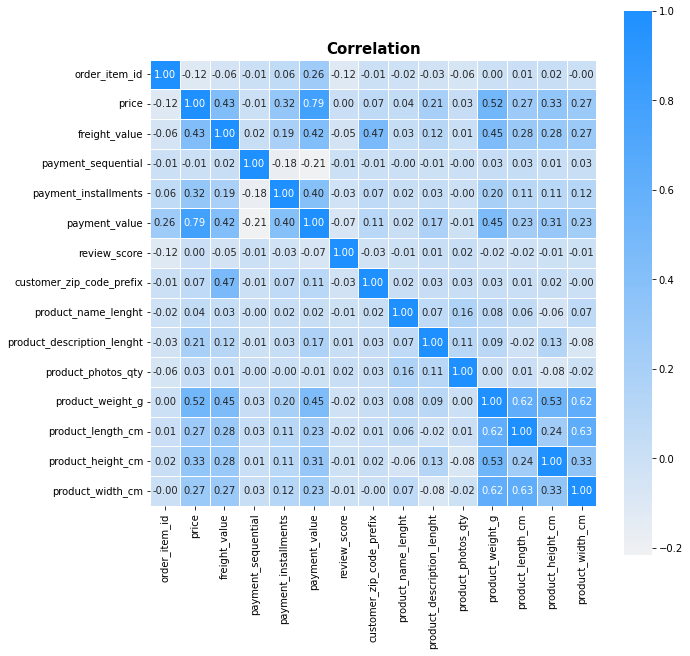

In [ ]:
# Melihat korelasi pada fitur numerikal
corr = df[numerical].corr('spearman') #menggunakan spearman karena data tidak terdistribusi normal

plt.figure(figsize=(10, 10))
warna=sns.light_palette("dodgerblue", as_cmap=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=warna, square=True, linewidths=0.5)
plt.title('Correlation', size=15, weight='bold')
plt.show()

Pada plot diatas, dapat dilihat bahwa 'price' dan 'freight value' memiliki korelasi yang cukup tinggi dengan payment value dimana semakin tinggi angka 'price' dan 'freight value' maka semakin timggi payment valuenya.

### 3. Anomaly Identify

In [ ]:
# Membuat tabel deskripsi
pd.set_option('display.max_colwidth', None)

list_info = []
for kolom in df.columns:
    list_info.append([kolom, 
                       df[kolom].dtype ,
                       df[kolom].isna().sum(), 
                       round(df[kolom].isna().sum()/df.shape[0]*100,1),
                       df[kolom].nunique(),
                       df[kolom].drop_duplicates().sample(5).values])
    
tabel_info = pd.DataFrame(columns= ['Column Name','Data Type','Missing Value','Missing Value Percentage', 'nUnique','UniqueSamples' ],
                            data = list_info)
                            
tabel_info


,Column Name,Data Type,Missing Value,Missing Value Percentage,nUnique,UniqueSamples
0,order_id,object,0,0.0,99441,"[88e2adba13194300be8cfaeee4512133, dc400373e624e9b0435847a79813c658, ce101239d4d3c22d02503fc803c73be6, 428cc5c73a0cf1cc3dcd64c660c85e3d, ea29d09fa496c9e054d57d5f7f153478]"
1,customer_id,object,0,0.0,99441,"[ad93607713cebd330319c9fb27d33ab0, 4a8fd791410e8ec07fd17d12cdfdd662, ce0ceb45fe0c526c8b6959f36131687f, 5741b6f030a22bd35a06b1d168c6c6c9, 47cb699aff55772778a179d9a6b32bcb]"
2,order_status,object,0,0.0,8,"[created, canceled, invoiced, approved, unavailable]"
3,order_purchase_timestamp,object,0,0.0,98875,"[2018-05-08 19:05:19, 2018-01-23 22:24:54, 2018-05-10 09:06:10, 2017-06-08 22:23:05, 2017-01-14 08:33:40]"
4,order_approved_at,object,177,0.1,90733,"[2018-04-27 11:15:26, 2018-07-18 21:22:25, 2018-03-04 13:21:28, 2018-07-10 04:35:10, 2017-05-07 19:01:54]"
5,order_delivered_carrier_date,object,2086,1.8,81018,"[2017-06-12 16:07:42, 2017-03-17 11:07:01, 2017-11-14 16:39:06, 2018-04-05 20:07:30, 2018-02-22 03:37:32]"
6,order_delivered_customer_date,object,3421,2.9,95664,"[2017-07-10 17:23:16, 2018-05-10 21:32:04, 2018-06-05 23:34:22, 2017-12-02 14:09:48, 2018-01-11 19:48:47]"
7,order_estimated_delivery_date,object,0,0.0,459,"[2017-12-27 00:00:00, 2018-08-10 00:00:00, 2017-10-30 00:00:00, 2018-01-16 00:00:00, 2017-02-21 00:00:00]"
8,order_item_id,float64,833,0.7,21,"[8.0, 11.0, 13.0, 1.0, 17.0]"
9,product_id,object,833,0.7,32951,"[21025aea6e634ed0ab9709a4fa5fb69c, 071b6fda0410cc12642f1083210f6703, 12722654d210214a6fa95baae1e37941, 9ead93350fbb3a5f0cc0b48c8c983748, 59dccecad0c81b2b36cec5f92e7fcf12]"


Data type dari kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date adalah object, dimana seharusnya adalah datetime. Terdapat missing value pada beberapa fitur.

In [ ]:
#Memeriksa duplikat
df.duplicated().sum()

0

Tidak ditemukan baris duplikat.

***
## **4. Preprocessing**


### 4.1 Menghapus kolom yang kurang revelan untuk analisis

In [ ]:
# membuat duplikasi dataframe
df_analytic = df.copy()

# Drop kolom yang kurang relevan dalam analisis kali ini
df_analytic.drop(['order_approved_at',	   
               'order_delivered_carrier_date',	
               'order_delivered_customer_date',
               'order_estimated_delivery_date',
               'shipping_limit_date',
                    'review_id',              
                    'review_comment_title',   
                    'review_comment_message', 
                    'review_creation_date',  
                    'review_answer_timestamp',   
                          'product_name_lenght',            
                          'product_description_lenght',
                          'product_photos_qty',
                          'product_weight_g',
                          'product_length_cm',
                          'product_height_cm',
                          'product_width_cm',
                    ],axis=1,inplace=True)

In [ ]:
df_analytic.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3.0,voucher,1.0,2.00,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2.0,voucher,1.0,18.59,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1.0,boleto,1.0,141.46,4.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


In [ ]:
df_analytic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_item_id                  118310 non-null  float64
 5   product_id                     118310 non-null  object 
 6   seller_id                      118310 non-null  object 
 7   price                          118310 non-null  float64
 8   freight_value                  118310 non-null  float64
 9   payment_sequential             119140 non-null  float64
 10  payment_type                   119140 non-null  object 
 11  payment_installments           119140 non-null  float64
 12  payment_value                 

Berdasarkan informasi datatype di atas, terlihat bahwa fitur 'order_purchase_timestamp' masih berupa object sehingga nantinya perlu diubah menjadi datetime.

### 4.2 Missing Value

<Axes: >

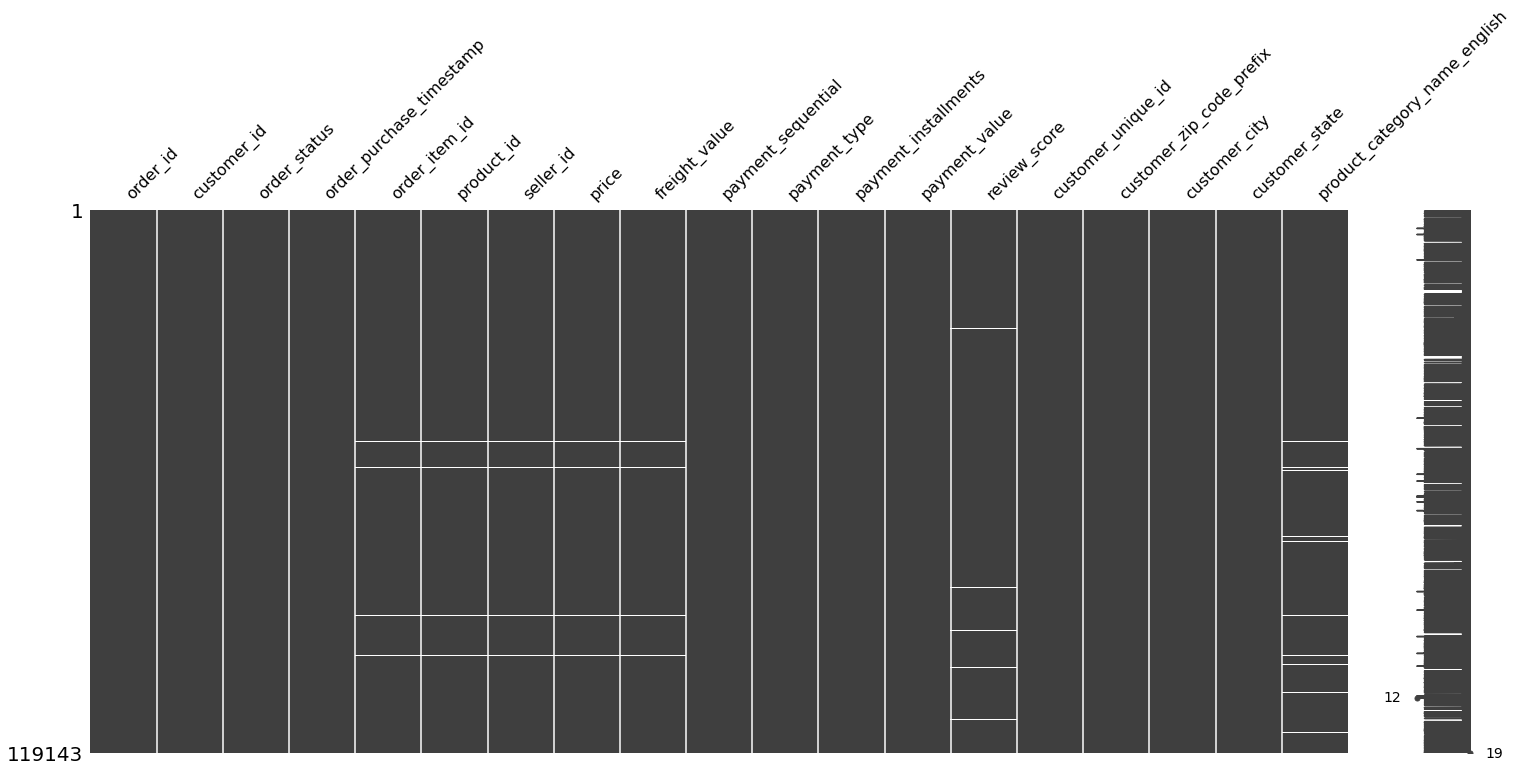

In [ ]:
# Melihat distribusi missing value
missingno.matrix(df_analytic)

Dari plot di atas, terlihat bahwa missing value relatif tidak banyak dan tidak berkorelasi antar fiturnya.

#### Drop Missing Value

In [ ]:
# Melihat jumlah misiing value
df_analytic.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_item_id                     833
product_id                        833
seller_id                         833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_score                      997
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2567
dtype: int64

In [ ]:
#Melihat data dari 833 missing value pada order_item_id
df_analytic[df_analytic['order_item_id'].isna()][['order_id','order_status','seller_id','product_id','order_item_id','freight_value','price']].head()

,order_id,order_status,seller_id,product_id,order_item_id,freight_value,price
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,NaN,NaN,NaN,NaN,NaN
702,c272bcd21c287498b4883c7512019702,unavailable,NaN,NaN,NaN,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,unavailable,NaN,NaN,NaN,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,unavailable,NaN,NaN,NaN,NaN,NaN
1362,00b1cb0320190ca0daa2c88b35206009,canceled,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Melihat apa saja status order dari missing value tersebut
df_analytic[df_analytic['order_item_id'].isna()]['order_status'].unique()

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

Data missing value di atas sepertinya berasal dari order yang bermasalah dimana tidak ada order yang berstatus delivered dan juga berhubungan dengan penjual yang tidak memiliki ID. Tidak terdapat penjelasan lebih lengkap akan hal tersebut. Maka missing value tersebut akan kita drop.                 

In [ ]:
#Drop missing value
df_analytic.dropna(axis=0,inplace=True,subset=['seller_id','product_id','order_item_id','freight_value','price'])

#### Fill Missing Value (payment_sequential,	payment_type,	payment_installments dan payment_value)

In [ ]:
#Melihat data dari missing value pada payment_sequential
df_analytic[df_analytic['payment_value'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
36864,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,NaN,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty
36865,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,NaN,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty
36866,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,NaN,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty


In [ ]:
# Melihat seluruh baris dari order id bfbd0f9bdef84302105ad712db648a6c
df_analytic[df_analytic['order_id']=='bfbd0f9bdef84302105ad712db648a6c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
36864,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,NaN,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty
36865,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,NaN,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty
36866,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,NaN,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty


Nomor order 'bfbd0f9bdef84302105ad712db648a6c' memiliki missing value pada kolom payment_sequential,	payment_type,	payment_installments dan payment_value, namun status pesanannya **delivered**. Kita asumsikan bahwa order ini adalah penukaran barang atau bisa saja hadiah untuk customer. Maka missing value akan diisi berdasarkan domain knowledge.

In [ ]:
#Mengisi missing value
df_analytic['payment_value'].fillna(0,inplace=True)            #Payment Value: 0
df_analytic['payment_sequential'].fillna(1,inplace=True)       #Payment Sequential: 1
df_analytic['payment_type'].fillna('credit_card',inplace=True) #Payment Type kita anggap sebagai credit card karena merupakan modus dari payment_type
df_analytic['payment_installments'].fillna(1,inplace=True)     #Payment Installments: 1

In [ ]:
df_analytic.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_score                      978
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    1734
dtype: int64

#### Fill Missing Value (Review Score)

In [ ]:
# Melihat data missing value pada review_score
df_analytic[df_analytic['review_score'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
20,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,1299.00,77.45,1.0,credit_card,10.0,1376.45,NaN,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ,construction_tools_construction
192,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,53.99,15.13,1.0,boleto,1.0,69.12,NaN,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG,perfumery
371,4906eeadde5f70b308c20c4a8f20be02,4e7656e34357b93f14b40c6400ca3f6e,delivered,2017-12-08 04:45:26,1.0,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,144.99,17.26,1.0,boleto,1.0,162.25,NaN,ea870f4fdfd85ac98ab775b76efe3143,23065,rio de janeiro,RJ,cool_stuff
455,b7a4a9ecb1cd3ef6a3e36a48e200e3be,c3d8fc500d86b1c961ee144395c13a57,delivered,2017-05-19 18:13:54,1.0,41171e11f920c47deb1809edda2bf09d,c42fd8e4d47dfb18ce5222f2dd7752f9,26.00,15.10,1.0,credit_card,4.0,41.10,NaN,367f4686d7112d69feed92b02a1775ed,88501,lages,SC,furniture_decor
463,59b32faedc12322c672e95ec3716d614,5baa82a2c45fa3220cb57d9881db3211,delivered,2018-06-27 11:10:11,1.0,040f34fe061b6024771f641fe922e782,850f4f8af5ea87287ac68de36e29107f,69.00,18.58,1.0,boleto,1.0,87.58,NaN,c56d066e503008b8d0bf4204857c588d,97110,santa maria,RS,watches_gifts


In [ ]:
# Melihat angka unik pada review score
df_analytic['review_score'].unique()

array([ 4.,  5.,  2.,  1., nan,  3.])

Review score yang kosong kita asumsikan customer tidak melakukan penilaian terhadap pesanannya. Maka akan kita isi dengan angka 0.

In [ ]:
# Mengisi review kosong dengan angka 0
df_analytic['review_score'].fillna(0,inplace=True) 

In [ ]:
df_analytic.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    1734
dtype: int64

#### Fill Missing Value (product_category_name_english)

Masih terdapat missing value pada kolom 'product_category_name_english' sebanyak 1734. Mari kita lihat 5 contoh product id nya.

In [ ]:
df_analytic[df_analytic['product_category_name_english'].isna()].head()[['product_id','product_category_name_english']]

,product_id,product_category_name_english
8,a1804276d9941ac0733cfd409f5206eb,NaN
129,71225f49be70df4297892f6a5fa62171,NaN
221,9820e04e332fc450d6fd975befc1bc28,NaN
274,3bc5164bc7f4be77002d6651da65c98c,NaN
316,5a848e4ab52fd5445cdc07aab1c40e48,NaN


Kemudian mari kita lihat satu persatu, apakah product id tersebut memiliki nama kategori pada baris yang lain.

In [ ]:
df_analytic[(df_analytic['product_id']=='a1804276d9941ac0733cfd409f5206eb') 
         | (df_analytic['product_id']=='71225f49be70df4297892f6a5fa62171') 
         | (df_analytic['product_id']=='9820e04e332fc450d6fd975befc1bc28')
         | (df_analytic['product_id']=='3bc5164bc7f4be77002d6651da65c98c')
         | (df_analytic['product_id']=='5a848e4ab52fd5445cdc07aab1c40e48')] [['product_id','product_category_name_english']]

,product_id,product_category_name_english
8,a1804276d9941ac0733cfd409f5206eb,NaN
129,71225f49be70df4297892f6a5fa62171,NaN
221,9820e04e332fc450d6fd975befc1bc28,NaN
274,3bc5164bc7f4be77002d6651da65c98c,NaN
316,5a848e4ab52fd5445cdc07aab1c40e48,NaN
...,...,...
117176,5a848e4ab52fd5445cdc07aab1c40e48,NaN
117447,5a848e4ab52fd5445cdc07aab1c40e48,NaN
117530,5a848e4ab52fd5445cdc07aab1c40e48,NaN
118333,5a848e4ab52fd5445cdc07aab1c40e48,NaN


Terlihat bahwa 5 product id tersebut tidak memiliki nama kategori pada baris yang lain. Dapat diasumsikan bahwa produk tersebut belum ada kategorinya. Oleh karena itu, missing value pada kolom tersebut akan kita isi dengan 'no_category'.

In [ ]:
# Mengisi missing value pada kolom 'product_category_name_english' dengan 'no_category'
df_analytic['product_category_name_english'].fillna('no_category',inplace=True) 

In [ ]:
df_analytic.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name_english    0
dtype: int64

### 4.3 Menghapus Outliers

Dari Data Distribution diperoleh outlier pada Payment Value yang nilainya sangat tinggi yaitu di atas 100.000. Selanjutnya, dilakukan pencarian unique id dari customer dengan payment value > 100.000

In [ ]:
df_dist.reset_index()[df_dist.reset_index()['payment_value']>100000]['customer_unique_id']

3826    0a0a92112bd4c708ca5fde585afaa872
Name: customer_unique_id, dtype: object

In [ ]:
# drop customer dengan unique id 0a0a92112bd4c708ca5fde585afaa872
df_analytic = df_analytic[df_analytic['customer_unique_id'] !='0a0a92112bd4c708ca5fde585afaa872']

### 4.4 Data Type

Data type kolom 'order_purchase_timestamp' adalah object, dimana seharusnya adalah datetime. Maka akan kita ubah data typenya.

In [ ]:
df_analytic['order_purchase_timestamp'] = pd.to_datetime(df_analytic['order_purchase_timestamp'])

### 4.5 Cleaned Data

In [ ]:
# Membuat tabel deskripsi
pd.set_option('display.max_colwidth', None)

list_info2 = []
for kolom in df_analytic.columns:
    list_info2.append([kolom, 
                       df_analytic[kolom].dtype ,
                       df_analytic[kolom].isna().sum(), 
                       round(df_analytic[kolom].isna().sum()/df_analytic.shape[0]*100,1),
                       df_analytic[kolom].nunique(),
                       df_analytic[kolom].drop_duplicates().sample(4).values])
    
tabel_info2 = pd.DataFrame(columns= ['Column Name','Data Type','Missing Value','Missing Value Percentage', 'nUnique','UniqueSamples' ],
                            data = list_info2)
                            
tabel_info2


,Column Name,Data Type,Missing Value,Missing Value Percentage,nUnique,UniqueSamples
0,order_id,object,0,0.0,98665,"[67a3664e806dcb942fb6d07d36c9ff8d, 33097b1461e9e4dce6383085eef494b9, a35a89e3ad801a6af8bdc4ecf67e0611, 39840651d975d5a257f08661d376e085]"
1,customer_id,object,0,0.0,98665,"[5c4fbfda89ecf784397c5a99ec36601a, 176db5144496b2af02a70eff67f81d11, 39337a7244f5d29aac81142dd6dd384b, 12f7134c678d3f3c6fb6ca7c8fce4d3a]"
2,order_status,object,0,0.0,7,"[shipped, processing, unavailable, delivered]"
3,order_purchase_timestamp,datetime64[ns],0,0.0,98111,"[2018-05-14T08:37:56.000000000, 2017-02-13T10:20:42.000000000, 2018-05-24T14:28:00.000000000, 2018-03-27T15:47:58.000000000]"
4,order_item_id,float64,0,0.0,21,"[9.0, 21.0, 12.0, 6.0]"
5,product_id,object,0,0.0,32950,"[88007f00299939d563c9565c054d2cd7, 05b316ac6e25ef5776b4841f5696bfb8, 5730d73af7faffe9b95d69fd03ea51df, ec72148301904394ad2c3f6204781102]"
6,seller_id,object,0,0.0,3095,"[d7485b33791774c36108f8c69602d48d, 74a9b9bddf14ece02beb81f52c41a88d, 8378eb36b6b70c5734e83ad7b8cdc3b7, 42fb44130ac3134cde8e35cf8ec7df25]"
7,price,float64,0,0.0,5967,"[155.99, 469.9, 97.4, 203.9]"
8,freight_value,float64,0,0.0,6999,"[65.28, 29.08, 32.35, 43.86]"
9,payment_sequential,float64,0,0.0,29,"[28.0, 7.0, 3.0, 26.0]"


Terlihat bahwa seluruh fitur sudah memiliki datatype yang sesuai dan sudah bersih dari missing value.

### 4.6 Menambah kolom baru

In [ ]:
#Memecah kolom 'order_purchase_timestamp' berdasarkan tahun, bulan, hari dan jam
df_analytic['purchase_year'] = df_analytic['order_purchase_timestamp'].dt.year
df_analytic['purchase_month'] = df_analytic['order_purchase_timestamp'].dt.month
df_analytic['purchase_day'] = df_analytic['order_purchase_timestamp'].dt.day
df_analytic['purchase_hour'] = df_analytic['order_purchase_timestamp'].dt.hour
df_analytic['purchase_month_period'] = df_analytic['order_purchase_timestamp'].dt.to_period('M')

#Membuat kolom nama bulan dan nama hari
df_analytic['purchase_day_name'] = df_analytic['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))
df_analytic['purchase_month_name'] = df_analytic['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))

In [ ]:
# Data yang sudah siap digunakan
df_analytic.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,...,customer_city,customer_state,product_category_name_english,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_month_period,purchase_day_name,purchase_month_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1.0,...,sao paulo,SP,housewares,2017,10,2,10,2017-10,Mon,Oct
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3.0,...,sao paulo,SP,housewares,2017,10,2,10,2017-10,Mon,Oct
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2.0,...,sao paulo,SP,housewares,2017,10,2,10,2017-10,Mon,Oct
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1.0,...,barreiras,BA,perfumery,2018,7,24,20,2018-07,Tue,Jul
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1.0,...,vianopolis,GO,auto,2018,8,8,8,2018-08,Wed,Aug


In [ ]:
df_analytic.shape

(118302, 26)

### 4.7 Membuat Mapping Product Category

In [ ]:
df_analytic['product_category'] = df_analytic['product_category_name_english']

In [ ]:
df_analytic['product_category_name_english'].nunique()

72

Terdapat 72 unique product category pada dataset ini. Karena terlalu banyak, maka kita lakukan mapping product category terlebih dahulu agar jumlahnya menjadi lebih sedikit, sehingga dapat membantu untuk proses analisa dan modeling.

In [ ]:
product_category_mapping = { 'perfumery': 'health_beauty',
                            'fashion_underwear_beach': 'fashion',
                            'fashion_bags_accessories': 'fashion',
                            'fashion_childrens_clothes': 'fashion',
                            'fashion_male_clothing': 'fashion',
                            'fashion_sport': 'fashion',
                            'fashion_shoes': 'fashion',
                            'fashio_female_clothing': 'fashion',
                            'office_furniture': 'furniture_decor',
                            'furniture_bedroom': 'furniture_decor',
                            'kitchen_dining_laundry_garden_furniture': 'furniture_decor',
                            'furniture_living_room': 'furniture_decor',
                            'furniture_mattress_and_upholstery': 'furniture_decor',
                            'home_appliances': 'housewares',
                            'home_appliances_2': 'housewares',
                            'home_construction': 'housewares',
                            'home_confort': 'housewares',
                            'home_comfort_2': 'housewares',
                            'small_appliances_home_oven_and_coffee': 'housewares',
                            'small_appliances': 'housewares',
                            'air_conditioning': 'electronics',
                            'consoles_games': 'electronics',
                            'computers': 'electronics',
                            'dvds_blu_ray': 'electronics',
                            'cds_dvds_musicals': 'electronics',
                            'fixed_telephony': 'telephony',
                            'costruction_tools_garden': 'garden_tools',
                            'diapers_and_hygiene': 'baby',
                            'books_general_interest': 'stationery and books',
                            'stationery': 'stationery and books',
                            'books_imported': 'stationery and books',
                            'books_technical': 'stationery and books',
                            'industry_commerce_and_business': 'stationery and books',
                            'books_general_interest': 'stationery and books',
                            'security_and_services': 'others',
                            'la_cuisine': 'others',
                            'arts_and_craftmanship': 'others',
                             'flowers': 'others',
                             'music': 'others',
                             'party_supplies': 'others',
                             'cine_photo': 'others',
                             'art': 'others',
                             'audio': 'others',
                             'construction_tools_safety': 'others',
                             'no_category': 'others',
                             'drinks': 'others',
                             'market_place': 'others',
                             'food_drink': 'others',
                             'christmas_supplies': 'others',
                             'costruction_tools_tools': 'others',
                             'construction_tools_lights': 'others',
                             'food': 'others',
                             'agro_industry_and_commerce': 'others',
                             'luggage_accessories': 'others',
                             'musical_instruments': 'others',
                             'tablets_printing_image': 'others',
                             'signaling_and_security': 'others',
                             'construction_tools_construction': 'others',
                             'bed_bath_table': 'bed_bath_table',
                             'computers_accessories': 'computers_accessories',
                             'watches_gifts': 'watches_gifts',
                             'toys': 'toys',
                             'sports_leisure': 'sports_leisure',
                             'auto': 'auto',
                             'cool_stuff': 'cool_stuff',
                             'pet_shop': 'pet_shop',
                             'furniture_decor': 'furniture_decor',
                             'housewares': 'housewares',
                             'electronics': 'electronics',
                             'telephony': 'telephony',
                             'garden_tools': 'garden_tools',
                             'baby': 'baby',
                             'health_beauty': 'health_beauty'
                             }

In [ ]:
# melakukan mapping product category
df_analytic['product_category_name_english'] = df_analytic['product_category_name_english'].map(product_category_mapping)

In [ ]:
df_analytic['product_category_name_english'].nunique()

18

Setelah dilakukan mapping, diperoleh 18 Product Category saja yang akan kita analisa dan dilakukan modeling.

***
## **5. Analytics**

### 5.1 Jumlah Order Perbulan


***Satu Unique Order ID bisa memiliki beberapa jenis product dan payment type berbeda***.<br> Oleh karena itu, untuk menghitung jumlah order, kita akan membuat tabel baru dengan menghapus duplikat berdasarkan subset order id agar satu unique order id tidak tehitung 2 kali.

In [ ]:
df_analytic['purchase_month_period']=df_analytic['purchase_month_period'].astype('str')

In [ ]:
df_order_dist = df_analytic.copy()

df_order_dist.drop_duplicates(subset = 'order_id', inplace = True)

Cek Jumlah Order
Berdasarkan nunique df_analytic: 98665
Count dari tabel distinct : 98665


,purchase_month_period,count
0,2016-09,3
1,2016-10,308
2,2016-12,1
3,2017-01,789
4,2017-02,1733
5,2017-03,2641
6,2017-04,2391
7,2017-05,3660
8,2017-06,3217
9,2017-07,3969


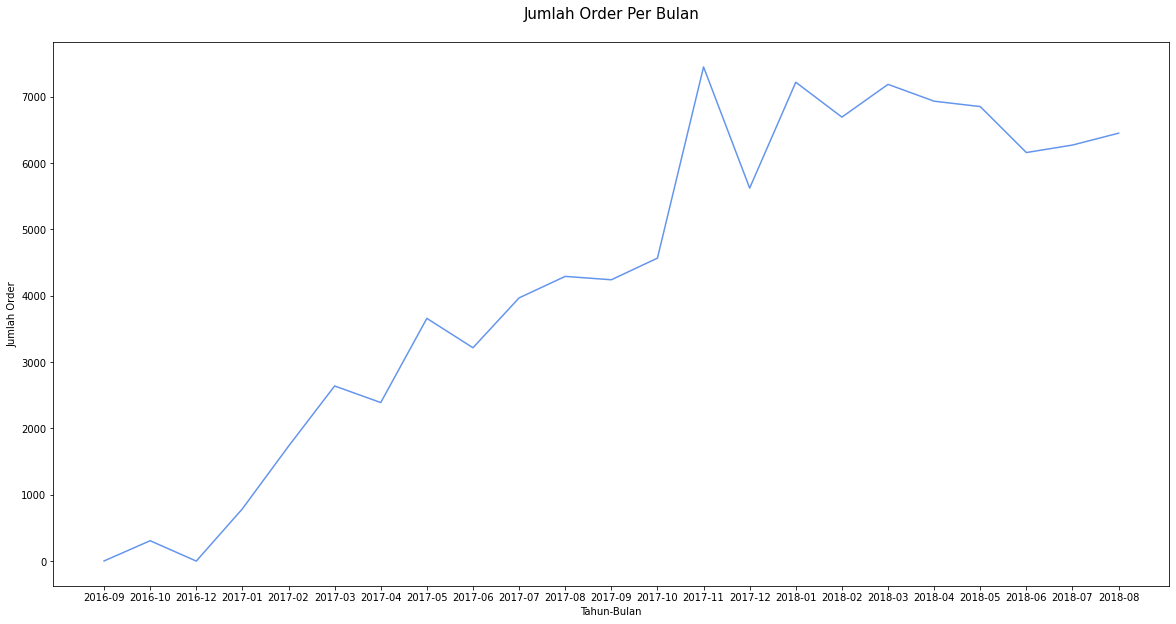

In [ ]:
# Membuat tabel jumlah order perbulan
line_order_count = df_order_dist.groupby('purchase_month_period')['order_id'].agg(['count']).reset_index()

print('Cek Jumlah Order')
print('Berdasarkan nunique df_analytic:', df_analytic['order_id'].nunique())

print('Count dari tabel distinct :', line_order_count['count'].sum())
display(line_order_count)

# Membuat visualisasi jumlah order
plt.figure(figsize = (20,10))
sns.lineplot(   data=line_order_count, 
                x=line_order_count['purchase_month_period'].drop(line_order_count.index[23]), # 2018-09 hanya ada 1 order, tidak ditampilkan pada visualisasi
                y=line_order_count['count'], color = 'cornflowerblue')
plt.title('Jumlah Order Per Bulan\n', size = 15)
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Order')
plt.show()

Jumlah order mengalami peningkatan dari tahun 2016 sampai 2018. Hal ini menunjukkan perusahaan Olist berkembang dengan baik. Jumlah order terbanyak terdapat pada November 2017 yaitu sebanyak 7188. Olist Ecommerce sendiri baru didirikan pada tahun 2015 . Artinya sebagai Ecommerce yang baru berdiri dan mengalami perkembangan yang cukup cepat dari tahun 2016-2018 menunjukkan bahwa Olist Ecommerce sudah cukup baik dalam menjangkau konsumen.

Ref: https://www.crunchbase.com/organization/olist

### 5.2 Nilai Transaksi Perbulan

***Payment Value dalam satu unique order id dipecah berdasarkan payment type dan sequential-nya***.<br> seperti contoh pada order id 'd744783ed2ace06cac647a9e64dcbcfd'. Oleh karena itu, untuk menghitung sales, kita tidak perlu melakukan distinct, dan menggunakan tabel df_analytic saja. 

In [ ]:
dfcek = df_analytic[df_analytic['order_id']=='d744783ed2ace06cac647a9e64dcbcfd'][['order_id','product_id',	'order_status','payment_sequential','payment_installments','payment_type','payment_value']]
dfcek

,order_id,product_id,order_status,payment_sequential,payment_installments,payment_type,payment_value
107048,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,11.0,1.0,voucher,1.47
107049,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,10.0,1.0,voucher,1.47
107050,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,12.0,1.0,voucher,1.47
107051,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,4.0,1.0,voucher,1.47
107052,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,8.0,1.0,voucher,1.47
107053,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,6.0,1.0,voucher,1.47
107054,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,9.0,1.0,voucher,1.47
107055,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,1.0,1.0,credit_card,4.68
107056,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,2.0,1.0,voucher,1.47
107057,d744783ed2ace06cac647a9e64dcbcfd,87dc701592a3d9c9b7b02e6b004f7764,delivered,5.0,1.0,voucher,1.47


Total Nilai Transaksi : R$ 20307529.9


,purchase_month_period,sum
0,2016-09,347.52
1,2016-10,74353.46
2,2016-12,19.62
3,2017-01,189570.02
4,2017-02,346280.99
5,2017-03,529993.27
6,2017-04,506900.50
7,2017-05,730912.77
8,2017-06,605639.30
9,2017-07,741936.39


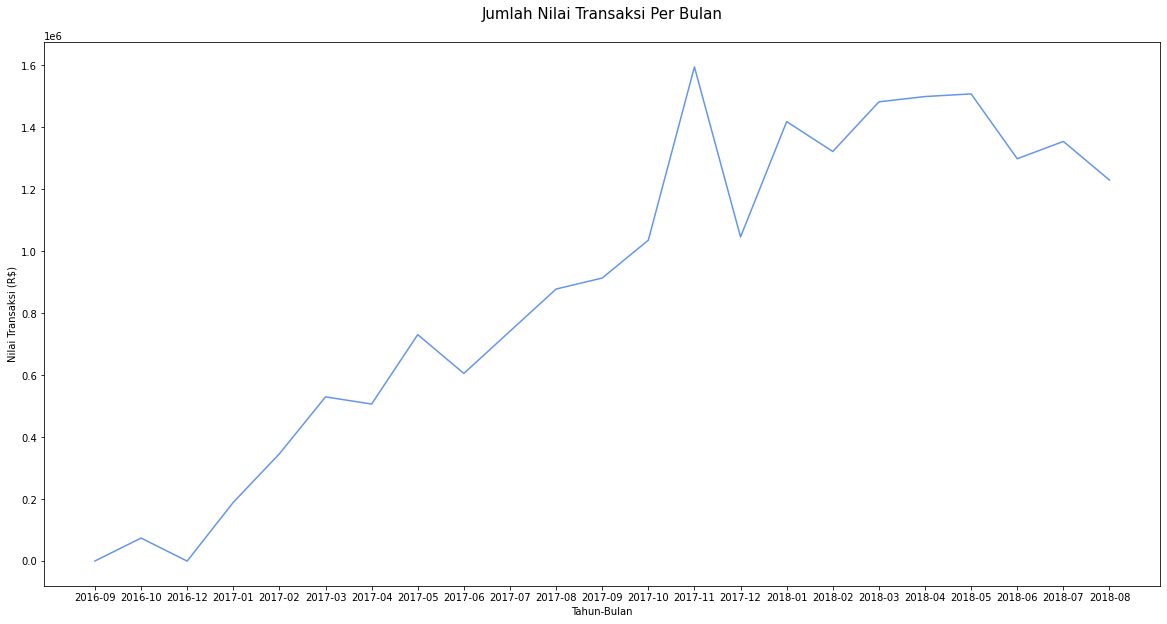

In [ ]:
# Membuat tabel jumlah order perbulan
line_payment_sum = df_analytic.groupby('purchase_month_period')['payment_value'].agg(['sum']).reset_index()

print('Total Nilai Transaksi : R$', line_payment_sum['sum'].sum())
display(line_payment_sum )

# Membuat visualisasi jumlah order kumulatif
plt.figure(figsize = (20,10))
sns.lineplot(   data=line_payment_sum, 
                x=line_payment_sum['purchase_month_period'].drop(line_payment_sum.index[23]), # 2018-09 hanya ada 1 order, tidak ditampilkan pada visualisasi
                y=line_payment_sum['sum'], color = 'cornflowerblue')
plt.title('Jumlah Nilai Transaksi Per Bulan\n', size = 15)
plt.xlabel('Tahun-Bulan')
plt.ylabel('Nilai Transaksi (R$)')
plt.show()

Sama dengan trend jumlah order, nilai transaksi tertinggi terdapat pada bulan November 2017 yaitu sebesar R$ 1.595.006.

### 5.3 Nilai Transaksi per Tahun

,purchase_year,sum
0,2016,74720.60
1,2017,9119801.66
2,2018,11113007.64


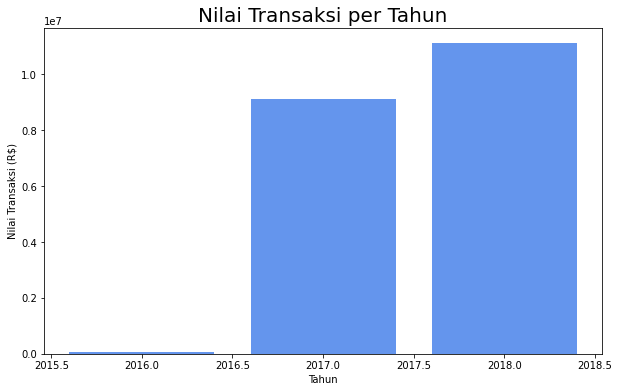

In [ ]:
# Membuat tabel nilai transaksi per tahun
bar_sales = df_analytic.groupby('purchase_year')['payment_value'].agg(['sum']).reset_index()
display(bar_sales)

# Membuat visualisasi nilai transaksi per tahun
plt.figure(figsize=(10,6))
fig = plt.bar(bar_sales['purchase_year'], bar_sales['sum'], color = 'cornflowerblue')
plt.title('Nilai Transaksi per Tahun', size = 20)
plt.xlabel('Tahun')
plt.ylabel('Nilai Transaksi (R$)')
plt.show()

Total Sales tahun 2018 mencapai R$ 11,113,007, **meningkat 20,4%** dari tahun 2017 walaupun tahun 2018 belum selesai.

### 5.4 Jumlah Order Per Hari

,purchase_day_name,count
1,Mon,16068
5,Tue,15831
6,Wed,15425
4,Thu,14639
0,Fri,14001
2,Sat,10813
3,Sun,11888


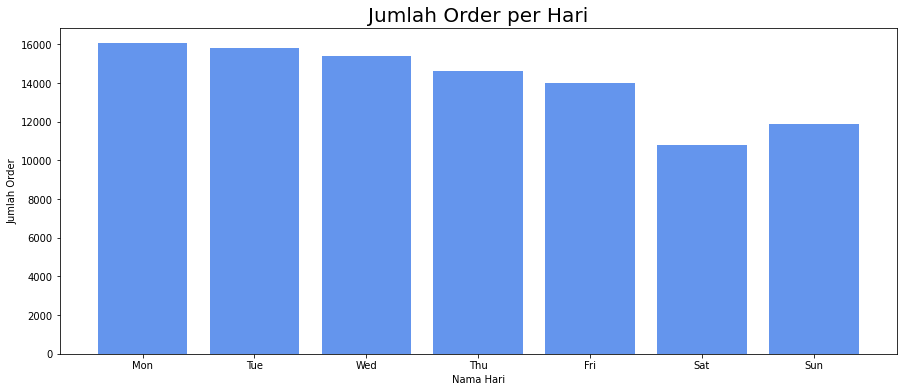

In [ ]:
# Membuat tabel jumlah order perhari
bar_order_day = df_order_dist.groupby('purchase_day_name')['order_id'].agg(['count']).reset_index()

# Mengurutkan manual
bar_order_day['purchase_day_name'] = pd.Categorical(bar_order_day['purchase_day_name'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'])
bar_order_day = bar_order_day.sort_values('purchase_day_name')

display(bar_order_day.sort_values('purchase_day_name'))

# Membuat visualisasi bar graph dari jumalh order per hari
plt.figure(figsize=(15,6))
plt.bar( bar_order_day['purchase_day_name'], 
         bar_order_day['count'], color = 'cornflowerblue', )
plt.title('Jumlah Order per Hari', size = 20)
plt.xlabel('Nama Hari')
plt.ylabel('Jumlah Order')
plt.show()

Dari grafik diatas, dapat dilihat bahwa purchase order banyak terjadi pada hari senin dan menurun hingga akhir minggu. Hal tersebut kemungkinan pada akhir pekan kebanyakan orang lebih memilih untuk melakukan kegiatan diluar. Selain itu juga dimungkinkan beberapa toko/seller tutup pada akhir pekan sehingga tidak dapat melakukan pemesanan. Maka, promosi dan pemberian voucher yang menarik dapat dilakukan pada awal pekan saat pengguna sedang aktif agar dapat meningkatkan transaksi.

### 5.5 Jumlah Order Per Jam

In [ ]:
# Membuat tabel jumlah order per hari per jam
heat_order_hour = df_order_dist.groupby(['purchase_day_name','purchase_hour'])['order_id'].agg(['count']).reset_index()

# Mengurutkan manual
heat_order_hour['purchase_day_name'] = pd.Categorical(heat_order_hour['purchase_day_name'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'])
heat_order_hour.sort_values(['purchase_day_name','purchase_hour'])

,purchase_day_name,purchase_hour,count
24,Mon,0,325
25,Mon,1,134
26,Mon,2,64
27,Mon,3,36
28,Mon,4,21
...,...,...,...
91,Sun,19,894
92,Sun,20,958
93,Sun,21,884
94,Sun,22,868


In [ ]:
# Melakukan pivot tabel jumlah order per hari per jam
heat_order_hour_pivot = heat_order_hour.pivot('purchase_day_name','purchase_hour','count')

In [ ]:
heat_order_hour_pivot

purchase_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
purchase_day_name,,,,,,,,,,,,,,,,,,,,,
Mon,325,134,64,36,21,22,68,159,475,772,...,1087,1071,1085,980,920,937,1023,1108,989,711
Tue,304,156,80,28,28,24,71,221,516,856,...,1113,1031,1076,958,874,912,977,1024,961,687
Wed,395,176,81,32,33,26,93,211,510,821,...,1045,974,1032,962,841,840,898,955,875,612
Thu,354,167,75,39,31,28,84,218,499,752,...,970,918,1071,901,780,818,833,834,853,545
Fri,422,211,70,48,40,36,97,204,493,761,...,953,973,965,810,719,773,730,720,699,508
Sat,313,171,67,42,25,24,53,105,248,428,...,674,718,691,700,707,752,725,652,547,427
Sun,265,141,68,44,27,27,34,105,204,345,...,679,711,708,794,890,894,958,884,868,604


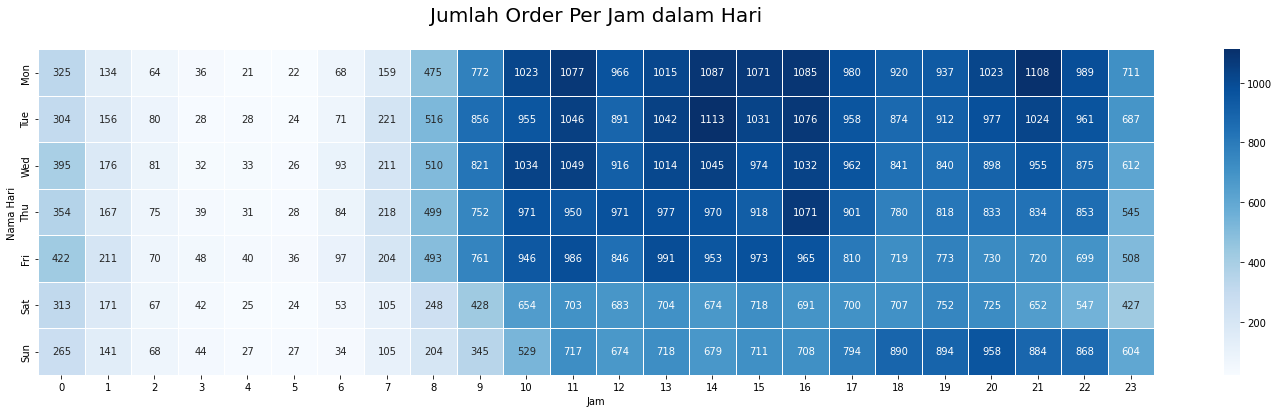

In [ ]:
#Membuat visualisasi heatmap
plt.figure(figsize=(25,6))
sns.heatmap(heat_order_hour_pivot, cmap=sns.color_palette("Blues", as_cmap=True), square = True, linewidths=0.5, annot= True, fmt="d")
plt.title("Jumlah Order Per Jam dalam Hari\n", size = 20)
plt.xlabel('Jam')
plt.ylabel('Nama Hari')
plt.show()


Pada grafik di atas dapat dilihat bahwa jumlah transaksi tertinggi dimulai dari jam 10 pagi hingga jam 4 sore dan kemudian menurun. Jumlah order kembali naik pada jam 8 hingga jam 10 malam. Hal tersebut disebabkan pada jam tersebut orang-orang mulai aktif melakukan kegiatannya, termasuk berbelanja online. sedangkan pada jam 1 hingga jam 6 pagi adalah jumlah transaksi terendah disebabkan orang-orang sedang beristirahat. Oleh karena itu, pemberian iklan, promosi atau event-event tertentu dapat dilaksanakan pada waktu tersebut agar dapat meningkatkan transaksi.

### 5.6 Frekuensi Jumlah Item dalam Tiap Transaksi

In [ ]:
item_order = df_analytic.groupby(['order_id']).agg({'order_item_id': pd.Series.nunique}).reset_index()

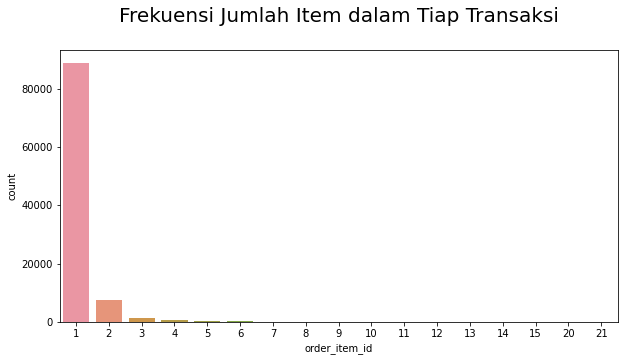

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = item_order, x='order_item_id')
plt.title("Frekuensi Jumlah Item dalam Tiap Transaksi\n", size = 20)
plt.show()

Dari plot di atas, diperoleh bahwa mayoritas jumlah item yang dipesan oleh konsumen yaitu 1 item saja. Hal ini menunjukkan bahwa masih terdapat peluang untuk menaikkan jumlah item yang dipesan konsumen, sehingga nantinya dapat menaikkan penjualan Olist Ecommerce. Beberapa rekomendasi strategi yang dapat dilakukan oleh Olist Ecommerce yaitu:
 - Memberikan tawaran bundling item dengan harga menarik.
 - Menawarkan item lain sebagai tambahan dari produk utama dengan harga menarik (cross selling).

### 5.7 Frekuensi Order dari Tiap Konsumen

In [ ]:
freq_cust = df_analytic.groupby(['customer_unique_id']).agg({'order_id': pd.Series.nunique}).reset_index()

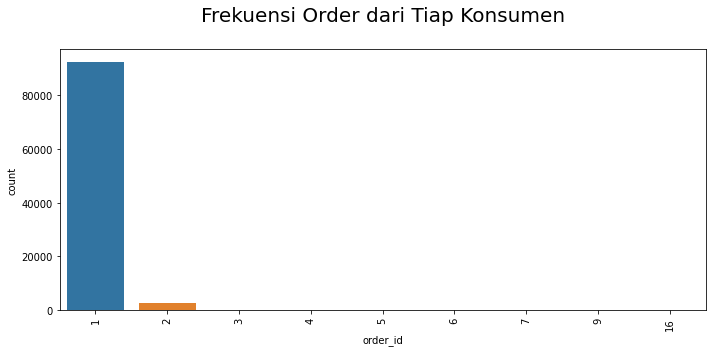

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data=freq_cust, x='order_id')
plt.title("Frekuensi Order dari Tiap Konsumen\n", size = 20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
one_order_percentage = round((len(freq_cust[freq_cust.reset_index()['order_id']==1])/len(freq_cust.reset_index())*100),0)
print(f'Terdapat {one_order_percentage}% konsumen yang melakukan order hanya sebanyak 1x')

Terdapat 97.0% konsumen yang melakukan order hanya sebanyak 1x


Dari plot di atas, diperoleh bahwa mayoritas konsumen (97%) baru pernah melakukan order sebanyak 1 kali saja, sedangkan konsumen yang melakukan order lebih dari 1 kali sangat minim (3%). Olist Ecommerce masih belum baik dalam meningkatkan transaksi dari tiap konsumen, namun mungkin sudah baik dalam memperoleh konsumen baru. Beberapa rekomendasi strategi yang dapat dilakukan oleh Olist Ecommerce yaitu:
- Memberikan notification/email ke konsumen untuk menjaga relationship dan mengingatkan konsumen untuk sekedar melihat-lihat Olist Ecommerce dan juga melakukan pembelanjaan.
- Mengadakan event di hari-hari tertentu untuk menarik konsumen lama supaya melakukan transaksi kembali di Olist Ecommerce.

### 5.8 Kategori Produk dengan Quantity Penjualan Terbanyak

In [ ]:
product_cat = df_analytic.groupby(['product_category_name_english', 'order_id']).agg({'order_item_id': pd.Series.nunique}).reset_index()
product_cat = product_cat.groupby('product_category_name_english').agg({'order_item_id': np.sum}).sort_values('order_item_id', ascending=False)

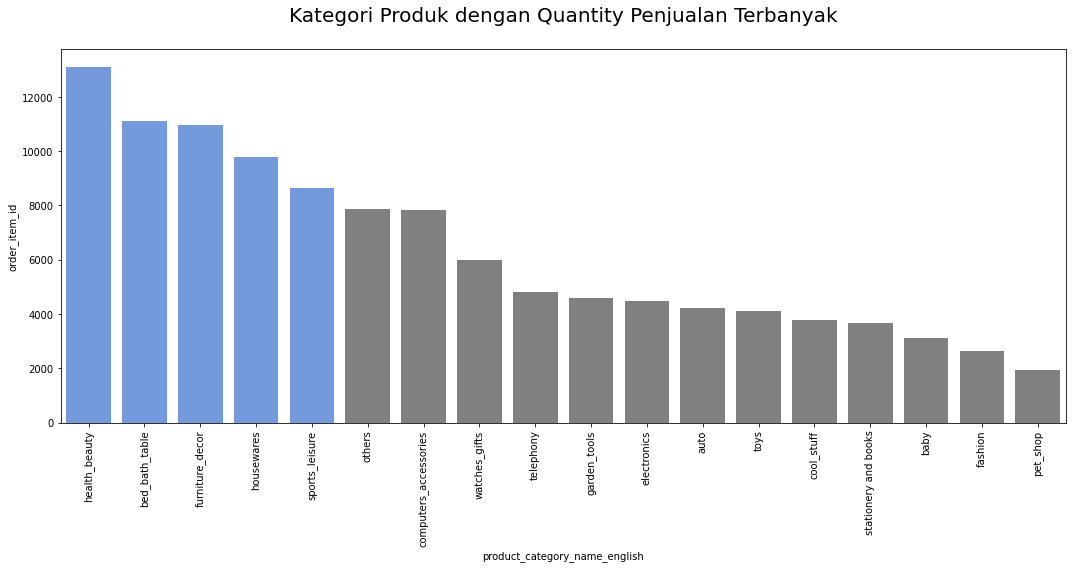

In [ ]:
cols1 = ['grey' if x < product_cat.loc['sports_leisure'].values else 'cornflowerblue' for x in product_cat['order_item_id']]

plt.figure(figsize = (15,8))
sns.barplot(data = product_cat, x=product_cat.index, y=product_cat['order_item_id'], palette=cols1)
plt.title("Kategori Produk dengan Quantity Penjualan Terbanyak\n", size = 20)
plt.xticks(rotation=90)
plt.tight_layout()

Dari plot di atas, diperoleh Top 5 dari kategori produk berdasarkan Quantity penjualannya yaitu health_beauty, bed_bath_table, furniture_decor, housewares, dan sports_leisure. Selanjutnya kita akan melihat Kategori Produk berdasarkan nilai penjualannya.

### 5.9 Kategori Produk dengan Jumlah Penjualan Terbanyak

In [ ]:
product_cat_sales = df_analytic.groupby(['product_category_name_english', 'order_item_id']).agg({'price': np.sum}).reset_index()
product_cat_sales = product_cat_sales.groupby('product_category_name_english').agg({'price': np.sum}).sort_values('price', ascending=False)

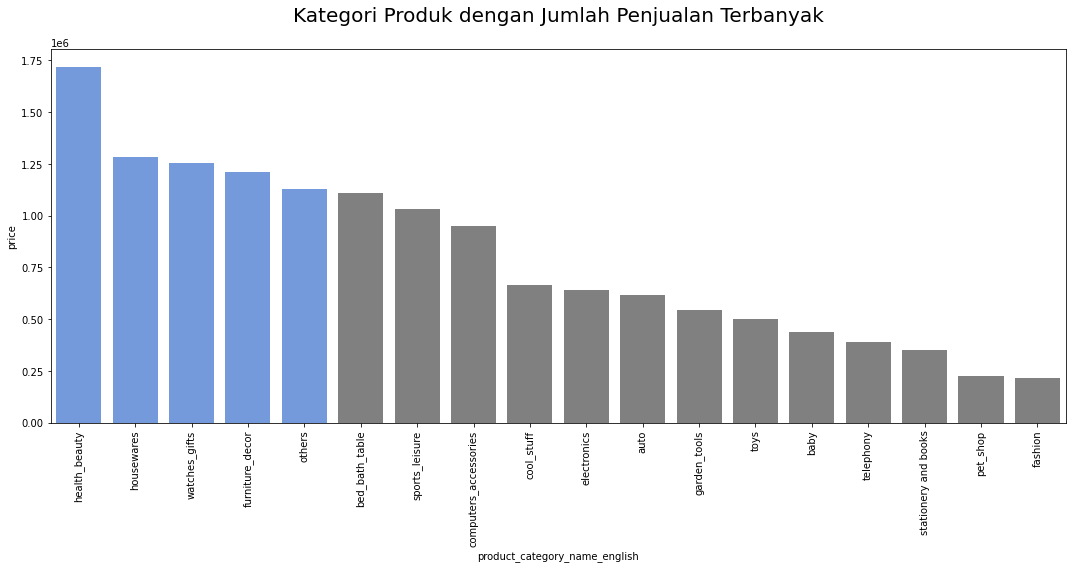

In [ ]:
cols = ['grey' if x < product_cat_sales.loc['others'].values else 'cornflowerblue' for x in product_cat_sales['price']]

plt.figure(figsize = (15,8))
sns.barplot(data = product_cat_sales, x=product_cat_sales.index, y=product_cat_sales['price'], palette=cols)
plt.title("Kategori Produk dengan Jumlah Penjualan Terbanyak\n", size = 20)
plt.xticks(rotation=90)
plt.tight_layout()

Dari plot di atas, ternyata diperoleh bahwa Top 5 kategori produk berdasarkan jumlah penjualan berbeda dengan apabila berdasarkan quantity penjualannya. Artinya, Olist Ecommerce dapat menyesuaikan kategori produk yang ingin ditingkatkan sesuai dengan tujuannya (apakah meningkatkan quantity ataupun jumlah penjualan). Hal yang dapat dilakukan misalnya dengan memperbanyak variasi barang yang ditawarkan pada kategori-kategori tersebut dan juga bisa dengan memperbanyak merchant yang berkualitas di kategori produk tersebut
 Hal ini juga dapat meningkatkan Brand Image dari Olist Ecommerce sendiri, sehingga Olist Ecommerce dapat lebih dikenal dan meningkatkan penjualannya.

### 5.10 Cohort Analysis

In [ ]:
df_cohort = df_analytic.copy()

In [ ]:
# create cohort date as cohort month
df_cohort['cohort_month']=df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

In [ ]:
# create current activity date as current month
df_cohort['current_month'] = df_cohort["order_purchase_timestamp"].dt.to_period("M")

In [ ]:
# make an aggregation based on cohort_month and current_month
df_cohort = df_cohort.groupby(["cohort_month", "current_month"]).agg(n_customers=("customer_unique_id", "nunique")).reset_index(drop=False)

In [ ]:
# subtracting cohort month vs current month to get month distance
df_cohort['period_month']=(df_cohort['current_month']-df_cohort['cohort_month']).apply(attrgetter('n'))

In [ ]:
df_cohort.head()

,cohort_month,current_month,n_customers,period_month
0,2016-09,2016-09,3,0
1,2016-10,2016-10,305,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11


In [ ]:
# create pivot table
cohort_pivot=df_cohort.pivot_table(index='cohort_month', columns='period_month', values='n_customers')
cohort_pivot

period_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,305.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,754.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1705.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2595.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2339.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN
2017-05,3560.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,10.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,3114.0,15.0,11.0,12.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# transform the number into percentage
cohort_size = cohort_pivot.iloc[:,0]
cohort_pivot_percentage = cohort_pivot.divide(cohort_size, axis = 0)
cohort_pivot_percentage

period_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003279,NaN,NaN,0.003279,NaN,0.003279,NaN,0.003279,NaN,0.003279,NaN,0.003279,0.006557,0.006557
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.003979,0.002653,0.001326,0.003979,0.001326,0.003979,0.001326,0.001326,NaN,0.003979,0.001326,0.006631,0.003979,0.001326,0.001326,0.002653,0.003979,0.001326,NaN
2017-02,1.0,0.002346,0.002933,0.001173,0.004106,0.001173,0.002346,0.001760,0.001173,0.001760,0.001173,0.002933,0.001173,0.001760,0.001173,0.000587,0.000587,0.002346,NaN,NaN
2017-03,1.0,0.005010,0.003468,0.003854,0.003468,0.001541,0.001541,0.003083,0.003468,0.000771,0.003854,0.001156,0.002312,0.001156,0.001541,0.002312,0.000771,0.001541,NaN,NaN
2017-04,1.0,0.005985,0.002138,0.001710,0.003420,0.002565,0.003420,0.002993,0.002993,0.001710,0.002565,0.000855,0.000855,0.000428,0.000855,0.000855,0.001710,NaN,NaN,NaN
2017-05,1.0,0.004775,0.004775,0.003933,0.003090,0.003371,0.004213,0.001404,0.002528,0.002809,0.002528,0.003371,0.002528,0.000281,0.001966,0.002528,NaN,NaN,NaN,NaN
2017-06,1.0,0.004817,0.003532,0.003854,0.002569,0.003854,0.003854,0.002248,0.001285,0.002248,0.003211,0.003532,0.001606,0.001285,0.001927,NaN,NaN,NaN,NaN,NaN


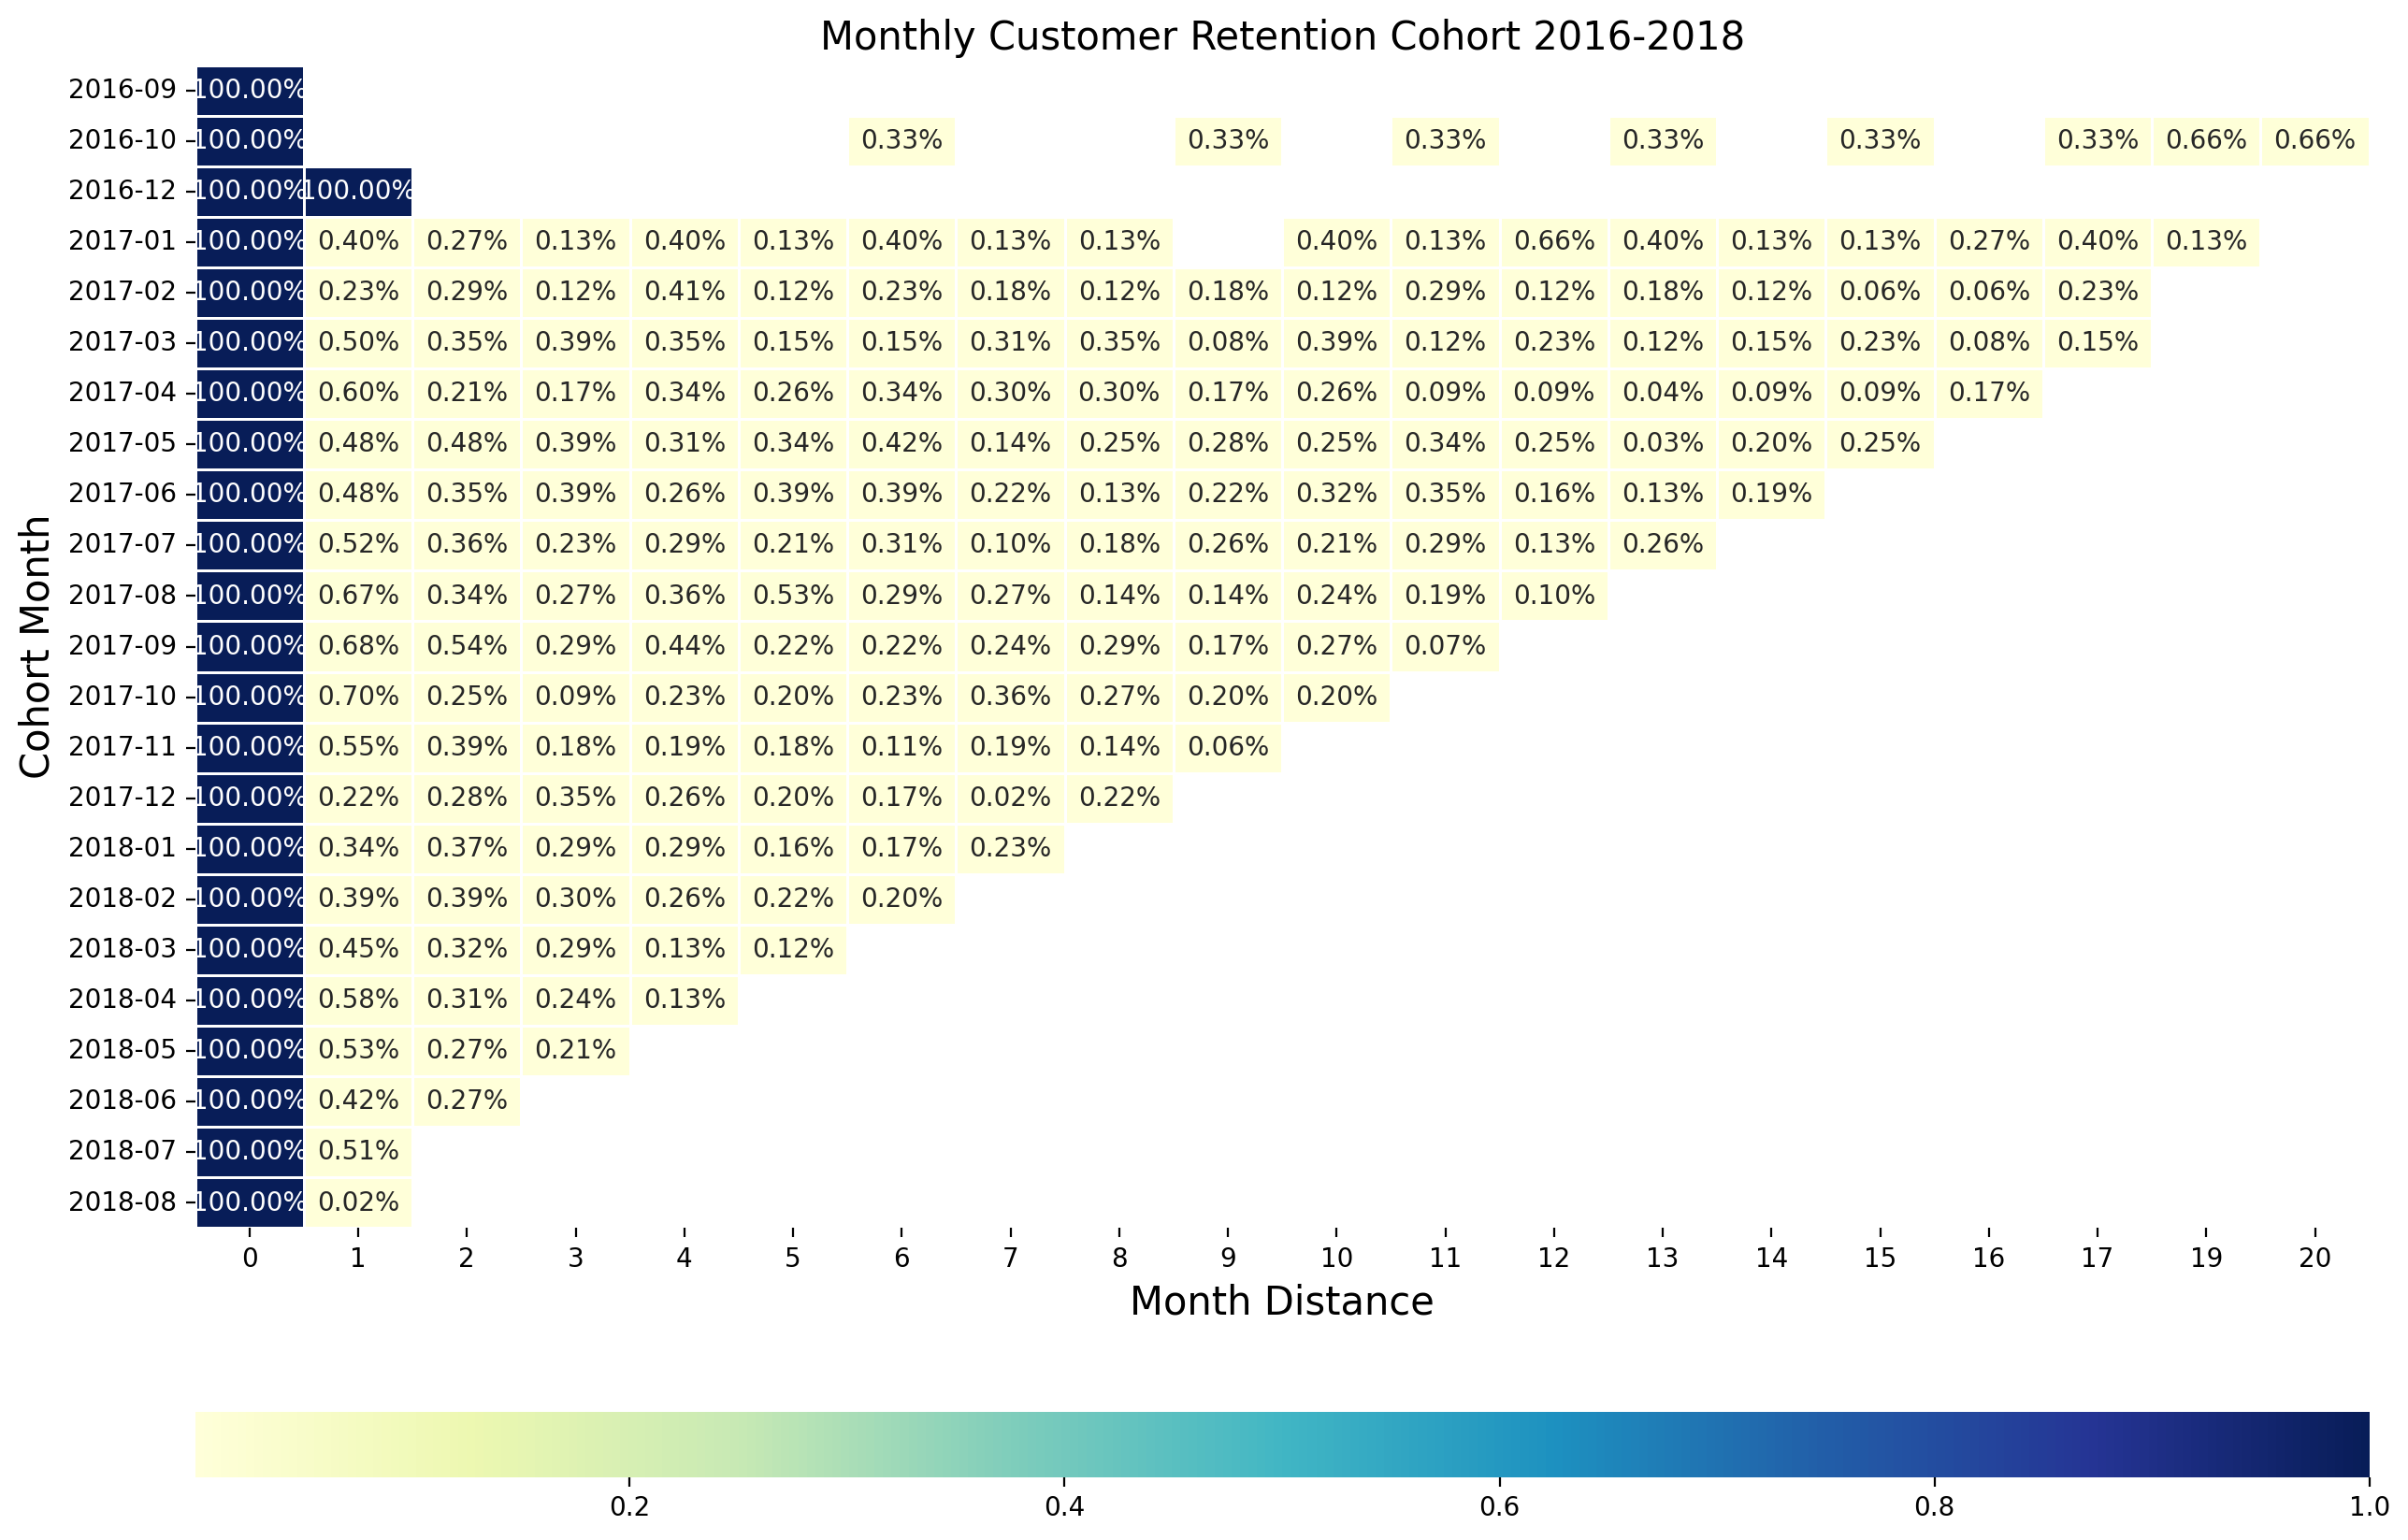

In [ ]:
# Setup the space of plot
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(15,10), dpi=200)

# Create heatmap 
ax = sns.heatmap(cohort_pivot_percentage, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 annot=True,
                 fmt = '.2%', 
                 linewidths=.5,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="YlGnBu")

# Set additional information
ax.set_title("Monthly Customer Retention Cohort 2016-2018",fontsize=15)
ax.set_ylabel("Cohort Month",fontsize=15) 
ax.set_xlabel("Month Distance",fontsize=15)
plt.show()

Berdasarkan hasil cohort analysis di atas yang menggunakan periode bulanan, diperoleh bahwa hanya kurang dari 1% customer yang kembali melakukan transaksi di bulan-bulan berikutnya. Hal ini sejalan dengan analisa pada poin 5.7 dimana mayoritas customer baru pernah bertransaksi sebanyak 1x saja di Olist Ecommerce. Tentunya hal ini perlu diperhatikan oleh Olist Ecommerce. Beberapa rekomendasi strategi yang dapat dilakukan oleh Olist Ecommerce serupa dengan strategi untuk meningkatkan frekuensi order dari konsumen yaitu:
- Memberikan notification/email ke konsumen untuk menjaga relationship dan mengingatkan konsumen untuk sekedar melihat-lihat Olist Ecommerce dan juga melakukan pembelanjaan.
- Mengadakan event di hari-hari tertentu untuk menarik konsumen lama supaya melakukan transaksi kembali di Olist Ecommerce.

### 5.11 Metode Pembayaran

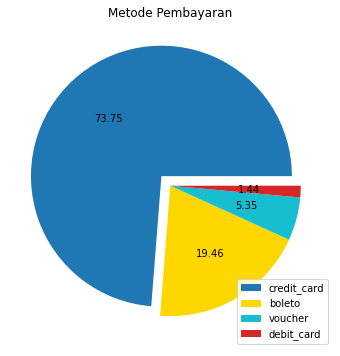

In [ ]:
#Membuat tabel agregasi untuk membuat visualisasi pie chart
pie = df_analytic.groupby('payment_type').agg({'order_id': 'count'}).reset_index().sort_values(by='order_id', ascending=False)

#Membuat visualisasi metode pembayaran menggunakan pie chart
plt.figure(figsize=(6,6))
plt.pie(pie['order_id'], 
        autopct = '%.2f',
        explode = (0.1,0,0,0),
        colors=('tab:blue','gold','tab:cyan','tab:red' )
        )
plt.legend(labels = pie['payment_type'])
plt.title('Metode Pembayaran')
plt.show()

Dari grafik di atas dapat dilihat bahwa transaksi yang menggunakan metode pembayaran credit card mencapai 73,76%. Hal tersebut sejalan dengan artikel yang diterbitkan oleh [JPMorgan](https://www.jpmorgan.com/merchant-services/insights/reports/brazil), bahwa penggunaan kartu kredit cukup tinggi di Brazil, menunjukkan permintaan yang kuat terhadap kredit konsumen. Maka, rekomendasi yang dapat diberikan adalah memperbanyak kerjasama dengan bank atau jasa penyedia credit agar semakin banyak pilihan credit card yang dapat digunakan di Olist Store. Kemudian juga dapat memberikan reward menarik atau diskon bagi pengguna credit card.

### 5.12 Negara Bagian

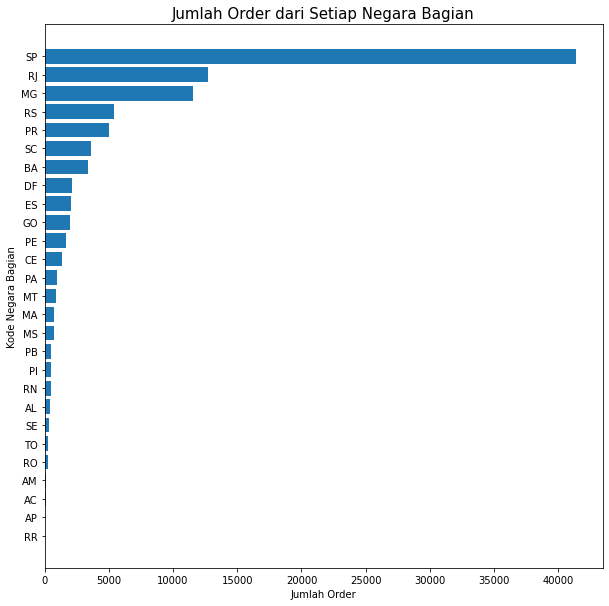

In [ ]:
#Membuat tabel agregasi negara bagian
bar_states = df_order_dist.groupby('customer_state')['order_id'].agg(['count']).reset_index().sort_values(by='count', ascending=True)

#Membuat visualisasi jumlah order di setiap negara bagian
plt.figure(figsize=(10,10))
plt.barh(bar_states['customer_state'], bar_states['count'])
plt.xlabel('Jumlah Order')
plt.ylabel('Kode Negara Bagian')
plt.title('Jumlah Order dari Setiap Negara Bagian', size = 15)
plt.show()

Dari grafik di atas, dapat dilihat bahwa jumlah order terbanyak berasal dari negara bagian Sao Paolo (SP). Hal tersebut mencapai 42% dari seluruh transaksi. Hal ini menunjukkan bahwa masih banyak terdapat peluang untuk meningkatkan transaksi dari negara bagian yang lain. Rekomendasi yang dapat diberikan adalah melakukan promosi dan awareness tentang olist store pada negara bagian yang memiliki jumlah order yang kecil. Kemudian melakukan remarketing terhadap customer dari Sao Paolo agar tetap setia dan mau melakukan pembelian kembali.

***
## **6. Customer Segmentation**

### 6.1 Recency, Frequency, Monetery (RFM)

In [ ]:
df_r = df_analytic.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
df_r.rename(columns={"order_purchase_timestamp":"LastPurchaseDate"}, inplace=True)
df_r["LastPurchaseDate"] = df_r["LastPurchaseDate"].dt.date

In [ ]:
#calculate recency
recent_date = df_analytic['order_purchase_timestamp'].dt.date.max()
df_r['Recency'] = df_r['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

In [ ]:
display(df_r.head(), df_r['Recency'].describe())

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,119
2,0000f46a3911fa3c0805444483337064,2017-03-10,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,293


count    95419.000000
mean       243.500456
std        153.161341
min          0.000000
25%        119.000000
50%        224.000000
75%        353.000000
max        729.000000
Name: Recency, dtype: float64

<Axes: title={'center': 'Distribution of Recency'}, xlabel='Recency', ylabel='Count'>

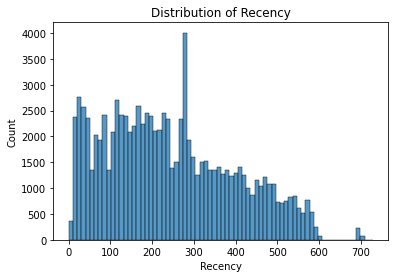

In [ ]:
plt.title('Distribution of Recency')
sns.histplot(data=df_r, x='Recency')

In [ ]:
# calculate frequency
df_f = df_analytic.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
df_f.rename(columns={"order_id":"Frequency"}, inplace=True)

In [ ]:
display(df_f.head(), df_f['Frequency'].describe())

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


count    95419.000000
mean         1.034018
std          0.211235
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: Frequency, dtype: float64

<Axes: title={'center': 'Distribution of Frequency'}, xlabel='Frequency', ylabel='Count'>

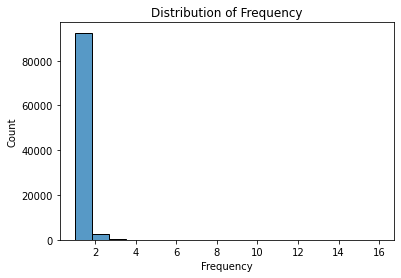

In [ ]:
plt.title('Distribution of Frequency')
sns.histplot(data=df_f, x='Frequency')

In [ ]:
# melihat lebih detail nilai frequency
df_f['Frequency'].value_counts()

1     92506
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: Frequency, dtype: int64

In [ ]:
df_m = df_analytic.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
df_m.columns = ['customer_unique_id', 'Monetary']

In [ ]:
display(df_m.head(), df_m['Monetary'].describe())

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


count    95419.000000
mean       212.824803
std        540.615333
min          0.000000
25%         63.990000
50%        113.330000
75%        203.300000
max      45256.000000
Name: Monetary, dtype: float64

<Axes: title={'center': 'Distribution of Monetary'}, xlabel='Monetary', ylabel='Count'>

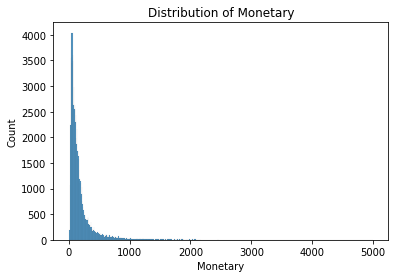

In [ ]:
plt.title('Distribution of Monetary')
sns.histplot(data=df_m[df_m['Monetary']<5000], x='Monetary')

In [ ]:
# merge data for RFM
df_rf = df_r.merge(df_f, on='customer_unique_id')
df_rfm = df_rf.merge(df_m, on='customer_unique_id').drop(columns='LastPurchaseDate')
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


Selanjutnya, kita akan memberikan score Recency, Frequency, dan Monetary sebagai berikut:
- Recency dibagi menjadi 3 kategori score (1-3) berdasarkan quantile
- Frequency dibagi menjadi 2 kategori score dimana 
 
 score 1 = freq 1 kali (artinya customer tidak melakukan pembelian berulang sama sekali)
 
 score 2 = freq >1 kali (artinya dcustomer pernah melakukan pembelian berulang)
 
- Monetary dibagi menjadi 3 kategori score (1-3) berdasarkan quantile

In [ ]:
df_rfm['R_score'] = pd.qcut(df_rfm['Recency'], 3, labels=[1, 2, 3]).astype(str)
df_rfm['F_score'] = df_rfm['Frequency'].apply(lambda x: '1' if x==1 else '2')
df_rfm['M_score'] = pd.qcut(df_rfm['Monetary'], 3, labels=[1, 2, 3]).astype(str)

In [ ]:
df_rfm['RFM_score'] = df_rfm['R_score'] + df_rfm['F_score'] + df_rfm['M_score']

In [ ]:
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,1,1,2,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,1,1,1,111
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3,1,2,312
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,3,213


In [ ]:
df_rfm['RFM_score'].value_counts()

211    10762
311    10715
112    10605
312    10419
111    10227
212    10136
113    10067
313     9811
213     9764
123      780
223      755
323      621
122      243
222      208
322      196
121       40
321       39
221       31
Name: RFM_score, dtype: int64

Berikutnya kita akan menentukan RFM Segment/Group berdasarkan nilai score RFM yang telah diperoleh. 

In [ ]:
# membuat fungsi untuk menentukan RFM Segmen
def segment(x):
    if x == '123' :
        return 'Champions'
    elif x in ['111', '112', '113'] :
        return 'Recent Users'
    elif x in ['211', '212', '213', '221', '222', '223'] :
        return "Can't Lose Them"
    elif x in ['121', '122'] :
        return "Loyal Customers"
    elif x in ['321', '322', '323'] :
        return "About to Sleep"
    else:
        return 'Lost Customers'

In [ ]:
df_rfm['segments'] = df_rfm['RFM_score'].apply(segment)

In [ ]:
df_rfm.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
About to Sleep,410.359813,2.087617,458.656752,856
Can't Lose Them,225.830427,1.034243,205.547015,31656
Champions,80.042308,2.206410,650.435731,780
Lost Customers,424.600355,1.000000,206.640145,30945
Loyal Customers,81.477032,2.024735,116.004134,283
Recent Users,81.221561,1.000000,209.504355,30899


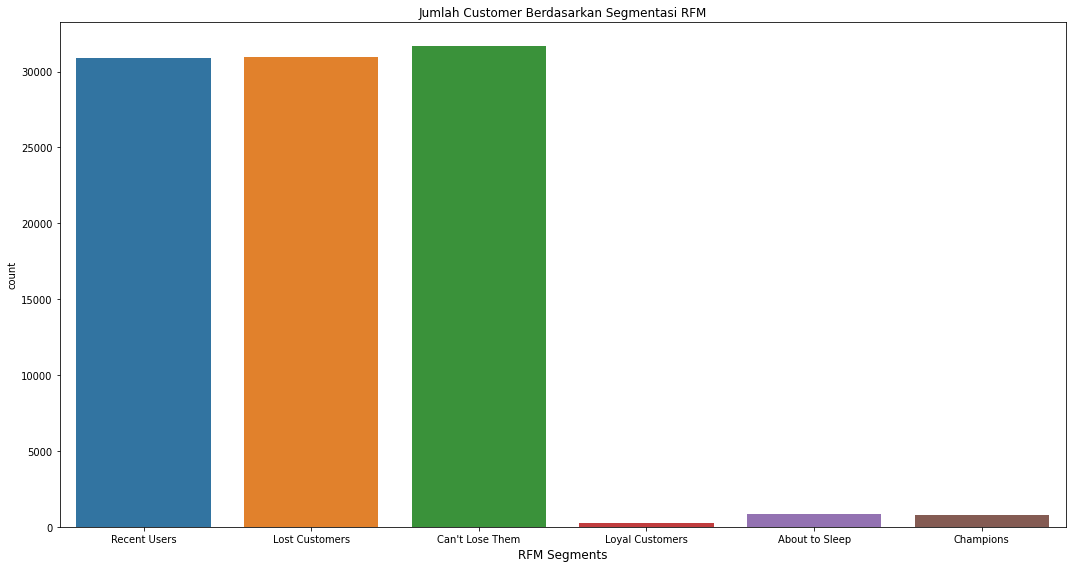

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_rfm, x='segments')
plt.xlabel('RFM Segments', size = 12)
plt.title('Jumlah Customer Berdasarkan Segmentasi RFM')
plt.tight_layout()
plt.show();

Berdasarkan segmentasi RFM yang sudah dilakukan, diperoleh 6 segmen dengan 3 segmen yang dominan secara jumlah yaitu Recent Users, Lost Customers, dan Can't Lose Them, sedangkan 3 segmen lainnya yaitu Loyal Customers, About to Sleep, dan Champions jumlah nya tidak dominan. Berikut beberapa rekomendasi yang dapat dilakukan melalui kegiatan pemasaran :
1. Recent Users <br>
Jika dilihat dari data historical, Olist Ecommerce kesulitan untuk mempertahankan customernya (terbukti dari frekuensi transaksi dari unique customer mayoritas hanya 1x saja). Segmen Recent Users akan menjadi potensi yang baik bagi Olist Ecommerce dimana customer baru saja melakukan transaksi di Olist Ecommerce. Olist Ecommerce perlu tetap menjaga relationship nya dengan segmen Recent Users ini. Beberapa rekomendasi untuk segment ini yaitu : <br>
  - Membuat Notification ditujukan untuk segmen ini.
  - Memberikan rekomendasi barang yang sejenis dengan barang yang telah dibeli.
  - Berinteraksi dengan Users seperti memberi ucapan selamat hari Raya ataupun yang lainnya.
  - Menawarkan program loyalitas kepada konsumen.

2. Lost Customers <br>
Segmen ini merupakan customer yang churn. Untuk mendapatkan kembali customer ini perlu usaha yang lebih. Beberapa rekomendasi untuk segmen Lost Customers yaitu : <br>
  - Memberikan promo khusus pada periode tertentu untuk menarik kembali segmen Lost Customers ini, misal dengan memberi voucher diskon saat hari Raya, voucher biaya pengiriman, dll.
  - Memberi Notification berisi pembelian terakhir yang dilakukan sehingga mengingatkan kembali tentang customer journey di Olist Ecommerce.

3. Can't Lose Them <br>
Segmen ini perlu dimonitor dan diberi perlakuan khusus untuk dapat mempertahankannya. Beberapa rekomendasi untuk segmen ini yaitu: <br>
  - Memberi promo khusus yang bersifat personal kepada segmen ini.
  - Memberikan rekomendasi barang yang sejenis dengan barang yang telah dibeli dengan lebih banyak pilihan/variasi.

4. Loyal Customers <br>
Segmen ini sudah puas dengan produk Olist namun perlu dijaga agar customer merasa dihargai. Beberapa rekomendasi untuk segmen ini yaitu: <br>
 - Memberi voucher khusus ketika mencapai jumlah transaksi tertentu.
 - Membuat kategori customer khusus ketika telah mencapai jumlah transaksi tertentu.
 - Menawarkan program loyalitas kepada konsumen.

5. About To Sleep <br>
Segmen ini sudah lama tidak melakukan transaksi dan sebentar lagi akan menjadi Lost Customers jika tidak diberi perlakuan apapun. Beberapa rekomendasi untuk segmen ini yaitu : <br>
  - Memberikan promo khusus pada periode tertentu.
  - Memberikan rekomendasi barang yang sejenis dengan barang yang telah dibeli.
  - Membuat Notification untuk menarik dan mengingatkan kembali customer terhadap Olist Ecommerce.
  - Memanfaatkan momen periode tertentu seperti liburan atau hari Raya.

6. Champions <br>
Segmen ini merupakan segmen terbaik yang dimiliki Olist Ecommerce sehingga sangat penting sekali untuk menjaga kepercayaan dari segmen ini. Beberapa rekomendasi untuk segmen ini yaitu: <br>
  - Membuat kategori customer khusus ketika telah mencapai jumlah transaksi tertentu.
  - Menawarkan program loyalitas kepada konsumen.
  - Memberi promo khusus yang bersifat personal kepada segmen ini.


### 6.2 Clustering KMeans Using Combined Database and RFM

Memilih fitur yang akan digunakan untuk pemodelan Clustering

In [ ]:
df_model = df_analytic[['order_id', 'customer_unique_id', 'order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments','payment_value', 'review_score', 
                        'payment_type', 'customer_state', 'product_category_name_english']]

In [ ]:
df_model = pd.get_dummies(df_model, columns=['payment_type', 'customer_state', 'product_category_name_english'])

In [ ]:
df_model.columns

Index(['order_id', 'customer_unique_id', 'order_item_id', 'price',
       'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher', 'customer_state_AC', 'customer_state_AL',
       'customer_state_AM', 'customer_state_AP', 'customer_state_BA',
       'customer_state_CE', 'customer_state_DF', 'customer_state_ES',
       'customer_state_GO', 'customer_state_MA', 'customer_state_MG',
       'customer_state_MS', 'customer_state_MT', 'customer_state_PA',
       'customer_state_PB', 'customer_state_PE', 'customer_state_PI',
       'customer_state_PR', 'customer_state_RJ', 'customer_state_RN',
       'customer_state_RO', 'customer_state_RR', 'customer_state_RS',
       'customer_state_SC', 'customer_state_SE', 'customer_state_SP',
       'customer_state_TO', 'product_category_name_english_auto',
       'product_category_name_english_b

Selanjutnya, data akan diubah ke bentuk dimana satu baris menunjukkan karakteristik dan historis dari tiap konsumen.

In [ ]:
df_model = df_model.groupby(['order_id', 'customer_unique_id']).agg({'order_item_id': np.max, 'price': np.sum, 'freight_value': np.sum, 'payment_sequential': np.max,
                                                          'payment_installments': np.sum, 'payment_value': np.sum, 'review_score': np.mean, 'payment_type_boleto': np.sum,
                                                          'payment_type_credit_card': np.sum,'payment_type_debit_card': np.sum, 'payment_type_voucher': np.sum, 
                                                          'customer_state_AC': np.sum, 'customer_state_AL': np.sum, 'customer_state_AM': np.sum, 'customer_state_AP': np.sum, 
                                                          'customer_state_BA': np.sum, 'customer_state_CE': np.sum, 'customer_state_DF': np.sum, 'customer_state_ES': np.sum, 
                                                          'customer_state_GO': np.sum, 'customer_state_MA': np.sum, 'customer_state_MG': np.sum, 'customer_state_MS': np.sum,
                                                          'customer_state_MT': np.sum, 'customer_state_PA': np.sum, 'customer_state_PB': np.sum, 'customer_state_PE': np.sum,
                                                          'customer_state_PI': np.sum, 'customer_state_PR': np.sum, 'customer_state_RJ': np.sum, 'customer_state_RN': np.sum, 
                                                          'customer_state_RO': np.sum, 'customer_state_RR': np.sum, 'customer_state_RS': np.sum, 'customer_state_SC': np.sum,
                                                          'customer_state_SE': np.sum,  'customer_state_SP': np.sum, 'customer_state_TO': np.sum, 
                                                          'product_category_name_english_auto': np.sum, 'product_category_name_english_baby': np.sum,
                                                          'product_category_name_english_bed_bath_table': np.sum, 'product_category_name_english_computers_accessories': np.sum,
                                                          'product_category_name_english_cool_stuff': np.sum, 'product_category_name_english_electronics': np.sum,
                                                          'product_category_name_english_fashion': np.sum, 'product_category_name_english_furniture_decor': np.sum,
                                                          'product_category_name_english_garden_tools': np.sum, 'product_category_name_english_health_beauty': np.sum,
                                                          'product_category_name_english_housewares': np.sum, 'product_category_name_english_others': np.sum, 
                                                          'product_category_name_english_pet_shop': np.sum, 'product_category_name_english_sports_leisure': np.sum,
                                                          'product_category_name_english_stationery and books': np.sum, 'product_category_name_english_telephony': np.sum,
                                                          'product_category_name_english_toys': np.sum, 'product_category_name_english_watches_gifts': np.sum 
                                                          }).reset_index()

In [ ]:
df_model = df_model.groupby('customer_unique_id').agg({'order_item_id': np.sum, 'price': np.sum, 'freight_value': np.sum, 'payment_sequential': np.sum,
                                                          'payment_installments': np.sum, 'payment_value': np.sum, 'review_score': np.mean, 'payment_type_boleto': np.sum,
                                                          'payment_type_credit_card': np.sum,'payment_type_debit_card': np.sum, 'payment_type_voucher': np.sum, 
                                                          'customer_state_AC': np.max, 'customer_state_AL': np.max, 'customer_state_AM': np.max, 'customer_state_AP': np.max, 
                                                          'customer_state_BA': np.max, 'customer_state_CE': np.max, 'customer_state_DF': np.max, 'customer_state_ES': np.max, 
                                                          'customer_state_GO': np.max, 'customer_state_MA': np.max, 'customer_state_MG': np.max, 'customer_state_MS': np.max,
                                                          'customer_state_MT': np.max, 'customer_state_PA': np.max, 'customer_state_PB': np.max, 'customer_state_PE': np.max,
                                                          'customer_state_PI': np.max, 'customer_state_PR': np.max, 'customer_state_RJ': np.max, 'customer_state_RN': np.max, 
                                                          'customer_state_RO': np.max, 'customer_state_RR': np.max, 'customer_state_RS': np.max, 'customer_state_SC': np.max,
                                                          'customer_state_SE': np.max,  'customer_state_SP': np.max, 'customer_state_TO': np.max,
                                                          'product_category_name_english_auto': np.sum, 'product_category_name_english_baby': np.sum,
                                                          'product_category_name_english_bed_bath_table': np.sum, 'product_category_name_english_computers_accessories': np.sum,
                                                          'product_category_name_english_cool_stuff': np.sum, 'product_category_name_english_electronics': np.sum,
                                                          'product_category_name_english_fashion': np.sum, 'product_category_name_english_furniture_decor': np.sum,
                                                          'product_category_name_english_garden_tools': np.sum, 'product_category_name_english_health_beauty': np.sum,
                                                          'product_category_name_english_housewares': np.sum, 'product_category_name_english_others': np.sum, 
                                                          'product_category_name_english_pet_shop': np.sum, 'product_category_name_english_sports_leisure': np.sum,
                                                          'product_category_name_english_stationery and books': np.sum, 'product_category_name_english_telephony': np.sum,
                                                          'product_category_name_english_toys': np.sum, 'product_category_name_english_watches_gifts': np.sum 
                                                          }).reset_index()

In [ ]:
df_model.head()

,customer_unique_id,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,payment_type_boleto,payment_type_credit_card,...,product_category_name_english_garden_tools,product_category_name_english_health_beauty,product_category_name_english_housewares,product_category_name_english_others,product_category_name_english_pet_shop,product_category_name_english_sports_leisure,product_category_name_english_stationery and books,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,129.90,12.00,1.0,8.0,141.90,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,18.90,8.29,1.0,1.0,27.19,4.0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,1.0,69.00,17.22,1.0,8.0,86.22,3.0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,25.99,17.63,1.0,4.0,43.62,4.0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,1.0,180.00,16.89,1.0,6.0,196.89,5.0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# combine database & RFM
df_model = pd.merge(df_model, df_rfm, on='customer_unique_id', how='left')

In [ ]:
# melihat dataframe yang dihasilkan untuk clustering
df_model.head()

,customer_unique_id,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,payment_type_boleto,payment_type_credit_card,...,product_category_name_english_toys,product_category_name_english_watches_gifts,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,segments
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,129.90,12.00,1.0,8.0,141.90,5.0,0,1,...,0,0,116,1,141.90,1,1,2,112,Recent Users
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,18.90,8.29,1.0,1.0,27.19,4.0,0,1,...,0,0,119,1,27.19,1,1,1,111,Recent Users
2,0000f46a3911fa3c0805444483337064,1.0,69.00,17.22,1.0,8.0,86.22,3.0,0,1,...,0,0,542,1,86.22,3,1,2,312,Lost Customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,25.99,17.63,1.0,4.0,43.62,4.0,0,1,...,0,0,326,1,43.62,3,1,1,311,Lost Customers
4,0004aac84e0df4da2b147fca70cf8255,1.0,180.00,16.89,1.0,6.0,196.89,5.0,0,1,...,0,0,293,1,196.89,2,1,3,213,Can't Lose Them


In [ ]:
X = df_model.drop(['customer_unique_id', 'order_item_id', 'payment_value', 'Frequency','R_score', 'F_score', 'M_score', 'RFM_score', 'segments'], axis=1)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

Karena data memiliki outlier, maka akan dilakukan scaling menggunakan *Robust Scaler*.<br>
Seperti dituliskan pada [artikel](https://proclusacademy.com/blog/robust-scaler-outliers/) berikut, Robust Scaler menggunakan median dan IQR untuk scalingnya, sehingga lebih resisten terhadap outliers.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [ ]:
pca=PCA(n_components=2)
pipeline=Pipeline([
    ('preprocess',scaler),
    ('PCA',pca)
])

In [ ]:
X_pca=pipeline.fit_transform(X)

In [ ]:
variance=[]

for i in range(2):
    variance.append(np.var(X_pca[:,i]))
print('informasi yang tersimpan pada 2 komponen pertama',round(sum(variance[:2])/sum(variance)*100,2),'%')

informasi yang tersimpan pada 2 komponen pertama 100.0 %


In [ ]:
X_pca=pd.DataFrame(X_pca, columns=['first component','second component'])
X_pca.head()

,first component,second component
0,-0.562958,-0.414991
1,-2.148072,-0.919168
2,-0.952292,-0.075971
3,-1.621657,-0.256300
4,-0.075606,-0.286386


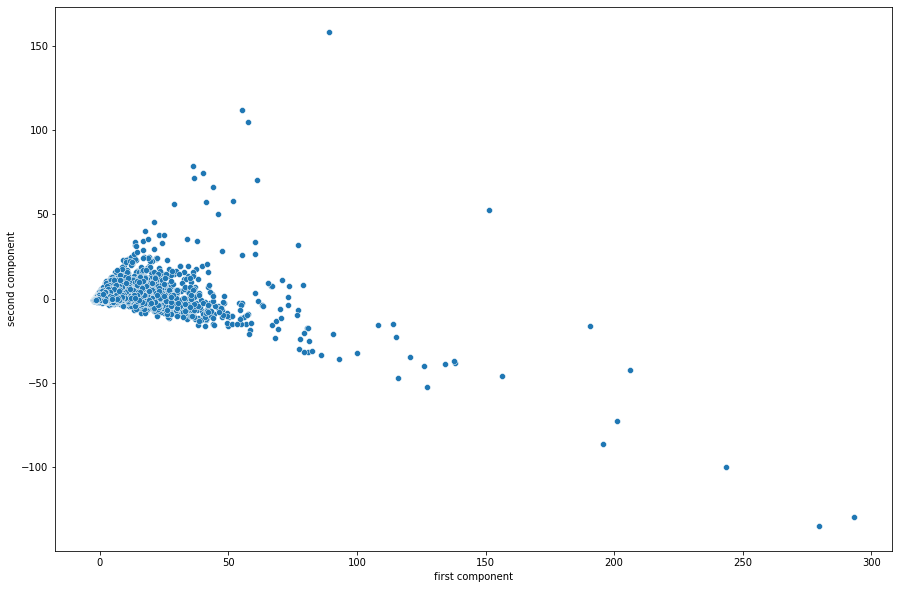

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='first component',y='second component', data=X_pca)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
k = range(2, 8)
inertia = []

for i in k:
    model_elbow = KMeans(n_clusters = i)
    model_elbow.fit(X_pca)
    inertia.append(model_elbow.inertia_)

print(k)
print(inertia)

range(2, 8)
[1444875.5980264973, 956949.6477553663, 688566.6717320285, 550254.0705035261, 466737.5811195072, 389229.1465250586]


Text(0, 0.5, 'Inertia Sum Squared Error')

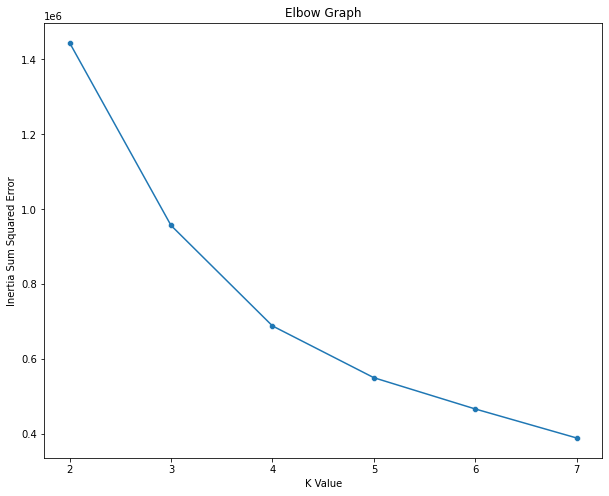

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(k, inertia)
sns.scatterplot(x=k, y = inertia)
plt.title('Elbow Graph')
plt.xlabel('K Value')
plt.ylabel('Inertia Sum Squared Error')

In [ ]:
score=[]
k_num= range(2,8)
best=0

for i in k_num:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_pca)
    labels=kmean.labels_
    sil_score=(silhouette_score(X_pca,labels,metric='euclidean'))
    score.append(sil_score)
    
    if best<sil_score:
        best=sil_score
        best_k=i

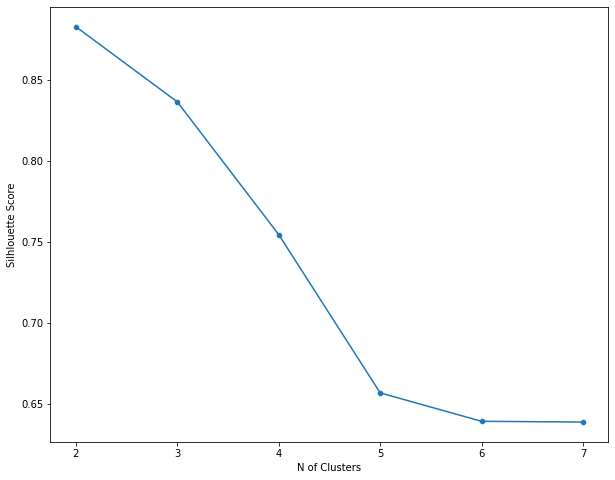

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(k_num,score)
sns.scatterplot(x=k, y = score)
plt.xticks(k_num)
plt.ylabel('Silhlouette Score')
plt.xlabel('N of Clusters')
plt.show()

Berdasarkan plot nilai Silhouette diperoleh K=2 dengan nilai silhoutte terbaik. Namun, dalam kasus Customer Segmentation ini kami perlu memilih jumlah cluster lebih dari 2 supaya dapat mendapatkan Customer Segmentation yang lebih spesifik dan kegiatan pemasaran yang spesifik juga. Oleh karena itu, kami memilih jumlah cluster sama dengan 3 cluster (K=3) karena memiliki nilai silhouette tertinggi kedua. Hasil elbow method juga mendukung grafik silhouette score dimana nilai Inertia Sum Squared Error mulai melandai pada K=3.

**Fitting Model**

In [ ]:
model = KMeans(n_clusters = 3, random_state=0) 

model.fit(X_pca)

KMeans(n_clusters=3, random_state=0)

In [ ]:
X_pca['Cluster']=model.labels_

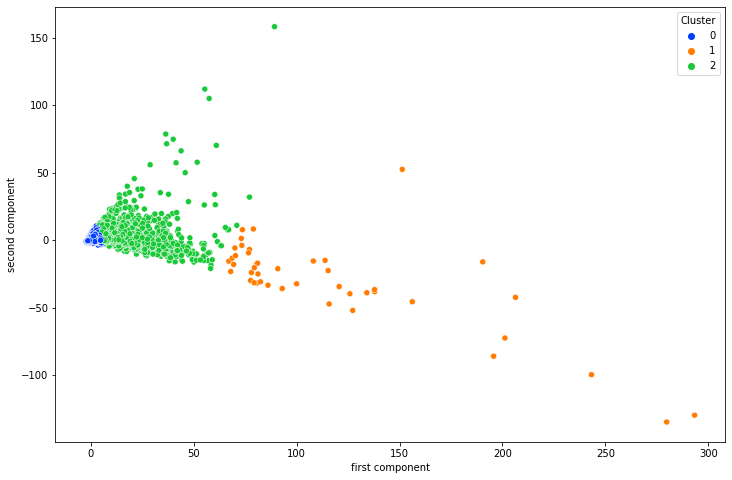

In [ ]:
#Membuat visualisasi sebaran cluster
plt.figure(figsize=(12,8))
sns.scatterplot(x='first component',y='second component', data=X_pca, hue = 'Cluster', palette = 'bright')
plt.title('')
plt.show()

,Cluster,count
0,0,91726
1,1,44
2,2,3649


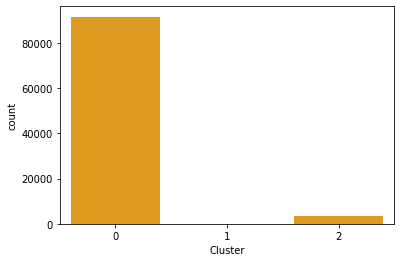

In [ ]:
#Melihat jumlah masing-masing cluster
display(X_pca.groupby('Cluster')['Cluster'].agg(['count']).reset_index())

sns.countplot(data = X_pca, x='Cluster',color = 'orange')
plt.show()


Dari plot di atas terlihat jumlah konsumen didominasi oleh Cluster 0, sedangkan Cluster 1 dan 2 jumlahnya relatif lebih sedikit.

In [ ]:
#Melihat keterangan masing-masing cluster
X['Cluster'] = model.labels_
Xtranspose = X.groupby('Cluster').mean()
Xtranspose.T

Cluster,0,1,2
price,118.944865,2235.263409,891.085596
freight_value,21.907591,293.023636,95.209320
payment_sequential,1.064867,1.272727,1.480680
payment_installments,3.252687,49.340909,13.067416
review_score,4.088224,2.704545,3.672434
payment_type_boleto,0.229161,3.159091,0.509455
payment_type_credit_card,0.871727,6.295455,1.922719
payment_type_debit_card,0.017683,0.045455,0.020554
payment_type_voucher,0.052766,0.000000,0.408879
customer_state_AC,0.000807,0.000000,0.004659


- Cluster 0 (Low Spender)<br>
Seperti sudah dijelaskan sebelumnya cluster ini merupakan cluster dengan jumlah konsumen terbanyak. Cluster ini memiliki rata-rata spending paling kecil dilihat dari Monetary, Price, dan Freight Value. Customer State yang dominan yaitu SP dan Product Category yang dominan yaitu health_beauty. Untuk Payment Installments cluster ini memiliki nilai yang paling kecil juga. Hal ini wajar jika melihat rata-rata spending yang dikeluarkan juga relatif kecil dibanding cluster lainnya, sehingga konsumen tidak membutuhkan jumlah installments yang banyak. Payment type yang dominan yaitu Credit Card. Nilai Recency dari cluster ini adalah yang terbesar dibanding cluster lainnya. Berdasarkan informasi yang sudah diperoleh, maka kami memberi rekomendasi kegiatan pemasaran sebagai berikut:
  1. Memperbanyak opsi cicilan kartu kredit dengan berbagai macam bank.
  2. Memberikan voucher promo pada periode tertentu. Misal voucher yang berlaku hanya pada saat hari Nasional / hari Raya tertentu.
  3. Memberikan voucher gratis/diskon ongkos kirim.
  4. Berinteraksi dengan Users seperti memberi ucapan selamat hari Raya ataupun yang lainnya.
  5. Memberi Notification berisi pembelian terakhir yang dilakukan sehingga mengingatkan kembali tentang customer journey di Olist Ecommerce.

- Cluster 1 (Big Spender) <br>
Cluster ini memiliki rata-rata spending paling besar jika dilihat dari Monetary, Price, dan Freight Value. Customer State yang dominan yaitu SP dan Product Category yang dominan yaitu furniture_decor. Untuk Payment Installments cluster ini memiliki nilai yang paling besar. Hal ini wajar jika melihat rata-rata spending yang dikeluarkan juga relatif tinggi dibanding cluster lainnya, sehingga konsumen akan menyukai jumlah installments yang banyak. Payment type yang dominan yaitu Credit Card.  Nilai Recency dari cluster ini adalah yang terkecil dibanding cluster lainnya. Berdasarkan informasi yang sudah diperoleh, maka kami memberi rekomendasi kegiatan pemasaran sebagai berikut:
  1. Memperbanyak opsi cicilan kartu kredit dengan berbagai macam bank
  2. Memperbanyak opsi jumlah cicilan
  3. Memberikan promo cicilan tanpa bunga
  4. Memberi promo/voucher khusus yang bersifat personal kepada segmen ini.
  5. Menawarkan program loyalitas kepada konsumen

- Cluster 2 (Medium Spender) <br>
Cluster ini memiliki rata-rata spending di tengah-tengah jika dilihat dari Monetary, Price, dan Freight Value. Customer State yang dominan yaitu SP dan Product Category yang dominan yaitu furniture_decor. Untuk Payment Installments cluster ini memiliki nilai di tengah-tengah dari ketiga cluster. Payment type yang dominan yaitu Credit Card.  Nilai Recency dari cluster ini adalah di tengah-tengah dari ketiga cluster yang ada. Berdasarkan informasi yang sudah diperoleh, maka kami memberi rekomendasi kegiatan pemasaran sebagai berikut:
  1. Memperbanyak opsi cicilan kartu kredit dengan berbagai macam bank
  2. Membuat Notification untuk menarik dan mengingatkan kembali customer terhadap Olist Ecommerce.
  3. Menawarkan program loyalitas kepada konsumen
  4. Berinteraksi dengan Users seperti memberi ucapan selamat hari Raya ataupun yang lainnya.

## **7. Conclusion and Recommendation**

#### Conclusion
Berdasarkan hasil analisa yang sudah dilakukan, diperoleh bahwa Olist Ecommerce memiliki masalah dimana hanya 97% konsumen yang melakukan transaksi lebih dari 1x. Dari Cohort Analysis juga diperoleh bahwa hanya kurang dari 1% konsumen yang kembali melakukan transaksi di bulan-bulan berikutnya. Hal ini menunjukkan bahwa Retention Customer yang masih minim dan masih terdapat potensi yang besar untuk Olist Ecommerce dapat mengembangkan bisnisnya dengan cara mempertahankan pelanggan yang lama. Berdasarkan informasi dari infografis "Customer Acquisition vs Retention Costs - Statistics And Trends" oleh Khalid [invesp](https://www.invespcro.com/blog/customer-acquisition-retention/), biaya untuk mendapatkan pelanggan baru adalah 5x lebih besar dibanding mempertahankan pelanggan lama serta probabilitas menjual ke pelanggan lama 60-70% sedangkan probabilitas menjual ke pelanggan baru hanya 5-20%. Dengan demikian, Retention Customer perlu menjadi fokus utama dari Olist Ecommerce untuk segera diperbaiki ke depannya.

Selanjutnya berdasarkan modeling yang sudah dilakukan menggunakan 2 metode diperoleh hasil sebagai berikut:
1. Metode RFM <br>
Dari Analisis Model RFM, diperoleh 6 segmen dengan 3 segmen yang dominan secara jumlah yaitu Recent Users, Lost Customers, dan Can't Lose Them, sedangkan 3 segmen lainnya yaitu Loyal Customers, About to Sleep, dan Champions jumlah nya tidak dominan. Hal ini berarti bahwa masih terdapat potensi bagi Olist Ecommerce dari segmen Recent Users dan Can't Lose Them.<br>

2. Clustering KMeans using Combined Databased and RFM <br>
Dari hasil clustering diperoleh 3 cluster yaitu Big Spender, Medium Spender, dan Low Spender. Mayoritas konsumen didominasi oleh cluster Low Spender. Hal ini dapat menjadi fokus segmen bagi Olist Ecommerce untuk dapat mengembangkan bisnisnya.

Berdasarkan 2 model yang sudah dibuat, kami memilih menggunakan model Kmeans dimana KMeans memiliki kelebihan dibanding RFM yaitu KMeans menggunakan algoritma dalam penentuan cluster nya serta sudah melibatkan berbagai fitur dalam proses clusteringnya, sedangkan model RFM dibuat berdasarkan aturan tertentu yang ditetapkan berdasarkan domain knowledge.


#### Recommendation
Olist Ecommerce perlu memberi perhatian lebih terhadap Retention dari pelanggan lamanya. Berdasarkan segmentasi hasil Clustering KMeans, kami pun memberikan rekomendasi berdasarkan tiap Cluster sebagai berikut:
- Cluster Low Spender <br>
  1. Memperbanyak opsi cicilan kartu kredit dengan berbagai macam bank.
  2. Memberikan voucher promo pada periode tertentu. Misal voucher yang berlaku hanya pada saat hari Nasional / hari Raya tertentu.
  3. Memberikan voucher gratis/diskon ongkos kirim.
  4. Berinteraksi dengan Users seperti memberi ucapan selamat hari Raya ataupun yang lainnya.
  5. Memberi Notification berisi pembelian terakhir yang dilakukan sehingga mengingatkan kembali tentang customer journey di Olist Ecommerce.

- Cluster Big Spender <br>
  1. Memperbanyak opsi cicilan kartu kredit dengan berbagai macam bank
  2. Memperbanyak opsi jumlah cicilan
  3. Memberikan promo cicilan tanpa bunga
  4. Memberi promo/voucher khusus yang bersifat personal kepada segmen ini.
  5. Menawarkan program loyalitas kepada konsumen

- Cluster Medium Spender <br>
  1. Memperbanyak opsi cicilan kartu kredit dengan berbagai macam bank
  2. Membuat Notification untuk menarik dan mengingatkan kembali customer terhadap Olist Ecommerce.
  3. Menawarkan program loyalitas kepada konsumen
  4. Berinteraksi dengan Users seperti memberi ucapan selamat hari Raya ataupun yang lainnya.
